# Диплом

_________

## Содержание

[Codebook](#Codebook)<br>
[1. Очистка и описание данных](#1.-Очистка-и-описание-данных)<br>
[2. Разведочный анализ данных (EDA)](#2.-Разведочный-анализ-данных-(EDA))<br>
[3. Формулирование гипотез и статистические тесты](#3.-Формулирование-гипотез-и-статистические-тесты)<br>
&nbsp;&nbsp;&nbsp;[3.1 Оценка нормальности распределения показателей](#3.1-Оценка-нормальности-распределения-показателей)<br>
&nbsp;&nbsp;&nbsp;[3.2 Определение степени влияния метрик на удовлетворенность услугами компании](#3.2-Определение-степени-влияния-метрик-на-удовлетворенность-услугами-компании)<br>
&nbsp;&nbsp;&nbsp;[3.3 Изучение величин показателей в разрезе оценки по первому вопросу](#3.3-Изучение-величин-показателей-в-разрезе-оценки-по-первому-вопросу)<br>
&nbsp;&nbsp;&nbsp;[3.4 Анализ жалоб на услуги компании по ответам на второй вопрос](#3.4.-Анализ-жалоб-на-услуги-компании-по-ответам-на-второй-вопрос) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4.1 Оценка значений метрик пользователей с жалобами на плохое качество телефонной связи](#3.4.1-Оценка-значений-метрик-пользователей-с-жалобами-на-плохое-качество-телефонной-связи) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4.2 Распределение значений показателей у пользователей с медленным интернетом](#3.4.2-Распределение-значений-показателей-у-пользователей-с-медленным-интернетом) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4.3 Оценка зависимости значения метрик от количества жалоб](#3.4.3-Оценка-зависимости-значения-метрик-от-количества-жалоб) <br>
[Итоги работы](#Итоги-работы) <br>

## Codebook

`megafon.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

## 1. Очистка и описание данных

In [1]:
#Импортируем библиотеки для работы:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import matplotlib.ticker as mtick
from scipy.stats import norm
from scipy.stats import mannwhitneyu #тест мана-уитни
from scipy.stats import ks_2samp #тест колмогорова - смирнова
from scipy.stats import shapiro #тест нормальности Шапиро
from scipy.stats import kruskal #Критерий Краскела — Уоллиса

In [2]:
#Загрузим датасет и посмотрим на его первые 5 строк:
megafon = pd.read_csv('megafon.csv', index_col = 0)
megafon.head()

Q1       Q2  Total Traffic(MB)  Downlink Throughput(Kbps)   
user_id                                                             
1        5      NaN          775.48846                     360.13  \
2        5        4          861.96324                    3023.54   
3        1        4          261.11860                     790.96   
4        8        3          179.18564                    2590.97   
5        2  2, 3, 4          351.99208                     731.61   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)   
user_id                                                                 
1                          86.56                                 3.93  \
2                         411.18                                 1.27   
3                          34.20                                 1.79   
4                         325.88                                 0.80   
5                         223.54                                 1.15   

         Video Streaming Download Throughput(Kbps)   
user_id                                              
1                                          1859.15  \
2                                           667.47   
3                                          1079.60   
4                                          7053.81   
5                                          4550.38   

         Video Streaming xKB Start Delay(ms)   
user_id                                        
1                                       2309  \
2                                       2080   
3                                       6367   
4                                       3218   
5                                       1767   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
user_id                                                               
1                                   1007.82                       83  
2                                    255.36                      425  
3                                    535.85                      485  
4                                   1221.02                       51  
5                                   2336.56                       68

In [3]:
#Посмотрим на общую информацию по датасету:
megafon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3112 entries, 1 to 3112
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Q1                                         3110 non-null   object 
 1   Q2                                         1315 non-null   object 
 2   Total Traffic(MB)                          3112 non-null   float64
 3   Downlink Throughput(Kbps)                  3112 non-null   float64
 4   Uplink Throughput(Kbps)                    3112 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 8   Web Page Download Throughput(Kbps)         3112 non-null   float64
 9   Web Average TCP RTT(ms)                    3112 non-null   int64  
dtypes: float64(6), int64(2), obje

Вполне предсказуемо, что ко второму вопросу приступили не все участники, отсюда пробелы именно в этом столбце. Также в 2 случаях нет ответа на первый вопрос. В остальных колонках пропусков не наблюдается. Тип данных соответствует ожидаемому.

In [4]:
#Посмотрим на "нули" для колонки Q1:
megafon[megafon['Q1'].isnull()]

Q1   Q2  Total Traffic(MB)  Downlink Throughput(Kbps)   
user_id                                                           
372      NaN  NaN          286.62191                    2320.25  \
3027     NaN  NaN          875.62280                    7258.66   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)   
user_id                                                                 
372                        75.60                                 3.84  \
3027                      226.08                                 0.60   

         Video Streaming Download Throughput(Kbps)   
user_id                                              
372                                        4499.92  \
3027                                       8336.42   

         Video Streaming xKB Start Delay(ms)   
user_id                                        
372                                     1790  \
3027                                    1087   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
user_id                                                               
372                                 1035.64                      200  
3027                                3112.83                       54

In [5]:
#Для Q2 выведем количество пустых строк:
megafon[megafon['Q2'].isnull()].shape[0]

1797

Если 2 строчки с пустыми ответами на вопрос 1 можно спокойно удалить, то с пустующими ячейками в части ответа на второй вопрос дела обстоят несколько сложнее. 

Во-первых, в общей сумме пустых ответов на вопрос 2 есть срез людей, которые не отвечали на это  вопрос по причине изначально высокой оценки (9-10). Такие ячейки можно заполнить каким-нибудь значением по умолчанию либо оставить их как есть.

Во-вторых, среди не ответивших много людей действительно недовольных качеством услуг, но по какой-то причине не ответивших на второй вопрос. Насчет извлечения этой группы из датасета следует хорошенько подумать, поскольку опрометчивое удаление такого большого среза данных может привести к потере какого-то важного тренда (у всех недовольных, как ответивших, так и не ответивших, может быть одинаковый разброс отдельных показателей). Поэтому к решению этого вопроса мы подойдем чуть позже.

In [6]:
#А пока можно удалить 2 строчки с отсутствующим ответом на первый вопрос:
megafon.dropna(subset=['Q1'], inplace = True)

In [7]:
#Посмотрим подробнее на содержимое нечисловых (на данный момент) столбцов 
#с целью определения логичности предоставленных данных и их смыслового соответствия.
def print_distinct(col_list, dataset):
    for col in col_list:
        unique =  dataset[col].unique()
        print('Уникальные значения столбца ',col,': ' , unique, '\n')
print_distinct(list(megafon.columns[:2]), megafon)

Уникальные значения столбца  Q1 :  ['5' '1' '8' '2' '3' '9' '10' '7' '4' '11' '6' '2, 9' '0' '1, 3' '19' '15'
 '1, 6' '***** ** ***'
 '3 - дер.Ширяево Волоколамского района, 9 - в Москве' '10, 9'
 'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !'
 'ОЦЕНКА-3/НЕВАЖНО/' 'Отвратительно' 'Я ценой услуг не удовлетворен'
 'Пока не понял' '3, 9' '5, 6' '0, 1, 5' '5, 7' 'Hi'
 '4. Тульская область Заокский район. Романовские дачи связи почти нет'
 'Немагу дать атценку денги незашто снимаеть скоро выклучаю' '10, 50'
 'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555' '?' 'Поохое'
 'Когда в Москве-10 а когда в калужской области в деревне Бели-1' 'Нет'
 'Да' 'Ужасно'
 '3 тройка, связь отвратительная, жалко платить за такой тарив'
 'Чдтчдтччдтччч' '3, 7' '20, 89031081392' '1, 8' 'Без з' '10, 5' '2, 5'
 'Я в Смол. Области живу сейчас, не пользуюсь телефоном совсем'] 

Уникальные значения столбца  Q2 :  [nan '4' '3' '2, 3, 4' '4, 5' '1, 3, 4' '1, 3, 4, 5' '1, 3' '3, 4' '1, 2'
 '3, 5' '1'

Как видно из перечисленных значений, есть необходимость датасет основательно почистить для лучшей читаемости. Проще начать со столбца с ответом на первый вопрос.

In [8]:
# Удалим из столбца с первым вопросом нечисловые ответы и переведем столбец в тип numeric:
megafon = megafon[megafon['Q1'].apply(lambda x: x.isnumeric())]
megafon["Q1"] = pd.to_numeric(megafon["Q1"])

In [9]:
#Теперь также извлечем значения больше 10 и меньше 1:
megafon = megafon[megafon['Q1'] <= 10]
megafon = megafon[megafon['Q1'] > 0]

Теперь первый столбец содержит адекватные значения.

В случае со вторым столбцом, произвести преобразование в числовые значения точно не получится: слишком много ответов, предоставленных через запятую. К тому же мы пока что не разобрались, что делать с NAN-ами. Но мы можем очистить нашу базу от странных значений (больше 7 и меньше 1).

In [10]:
#Сначала посмотрим на значения с нулями:
megafon[megafon.Q2.str.contains('0', na=False)]

Q1               Q2  Total Traffic(MB)  Downlink Throughput(Kbps)   
user_id                                                                      
477       1          0, 1, 7          238.34815                     394.19  \
658       1             0, 3          181.27977                    1266.58   
1547      8  0, 05, 2, 27, 7          294.23965                     565.92   
2558      1               10          570.81829                     804.92   
2897      1                0          602.51339                     509.56   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)   
user_id                                                                 
477                       116.83                                 0.66  \
658                       148.05                                 2.41   
1547                       57.13                                 0.58   
2558                      183.52                                 2.43   
2897                      183.42                                 1.89   

         Video Streaming Download Throughput(Kbps)   
user_id                                              
477                                        3426.20  \
658                                        2640.53   
1547                                       5741.26   
2558                                       2324.72   
2897                                       1310.71   

         Video Streaming xKB Start Delay(ms)   
user_id                                        
477                                     1721  \
658                                     1703   
1547                                    1877   
2558                                    4195   
2897                                    1632   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  
user_id                                                               
477                                 2821.92                       90  
658                                  506.89                      139  
1547                                2715.09                       69  
2558                                1692.84                       87  
2897                                1316.65                       91

В данном случае кажется, что строчки с id 477, 658, 2558 и 2897 скорее всего получились из за ошибочного нажатия пользователем в процессе отправки оценки на первый вопрос или неправильной обработки данных при сборке датасета, т.е. ответ был бы 10. Тем не менее, это только предположения и количество строчек с таким значением невелико, поэтому лучше их удалить. А вот значение в строке с id 1547 можно просто логично заменить на '5, 2, 7'.

In [11]:
#Замена значения:
megafon.loc[megafon.index == 1547, 'Q2'] = '5, 2, 7'
#Удаление странных нулей:
megafon = megafon[megafon.Q2.str.contains('0', na=False) ==False]

In [12]:
#Заменим последнее странное значение:
megafon.loc[megafon.Q2.str.contains('1, 2, 34', na=False), 'Q2'] = '1, 2, 3, 4'

In [13]:
# Логично будет также сразу поделить пользователей на 2 группы - довольных и недовольных.
# Пусть довольные клиенты будут обозначаться 1, а недовольные 0.
megafon['group'] = (megafon['Q1'] > 8).astype('int')
megafon.sample(5) #посмотрим результат

Q1   Q2  Total Traffic(MB)  Downlink Throughput(Kbps)   
user_id                                                          
2747      3    1          198.08062                      71.85  \
2877      3    4          132.47012                     647.93   
1274     10  NaN          125.45812                     190.89   
156       2  NaN          550.72732                    2791.84   
1179     10  NaN          115.87569                    2304.20   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)   
user_id                                                                 
2747                      112.06                                 1.04  \
2877                      178.95                                 0.94   
1274                      100.53                                 1.34   
156                        93.91                                 2.34   
1179                       81.97                                 0.72   

         Video Streaming Download Throughput(Kbps)   
user_id                                              
2747                                        643.16  \
2877                                       8721.89   
1274                                       1479.02   
156                                        2783.36   
1179                                       5561.43   

         Video Streaming xKB Start Delay(ms)   
user_id                                        
2747                                    3124  \
2877                                     991   
1274                                    2951   
156                                     2743   
1179                                    1597   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  group  
user_id                                                                      
2747                                 450.99                      420      0  
2877                                3481.84                      121      0  
1274                                 696.19                      294      1  
156                                 1635.68                       62      0  
1179                                1226.53                       69      1

In [14]:
# Посмотрим на те строки, в которых нет ответа на второй вопрос в группе недовольных:
megafon[(megafon['group'] == 0) & (megafon['Q2'].isnull())]

Q1   Q2  Total Traffic(MB)  Downlink Throughput(Kbps)   
user_id                                                          
1         5  NaN          775.48846                     360.13  \
6         3  NaN          416.67461                    1346.89   
12        1  NaN          730.53759                    4020.94   
13        1  NaN          828.47641                    2171.11   
17        3  NaN          401.82326                     151.41   
...      ..  ...                ...                        ...   
3085      1  NaN          563.54476                    1154.29   
3087      2  NaN          199.24502                     757.94   
3089      1  NaN          406.17290                     421.96   
3107      1  NaN          490.50187                    1992.68   
3112      6  NaN          596.22757                    2196.00   

         Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)   
user_id                                                                 
1                          86.56                                 3.93  \
6                         175.53                                 1.08   
12                        569.49                                 1.57   
13                         46.16                                 8.49   
17                         34.70                                 2.55   
...                          ...                                  ...   
3085                       52.04                                 0.59   
3087                      173.63                                 1.83   
3089                       98.46                                 1.99   
3107                       85.73                                 0.87   
3112                      265.87                                 0.41   

         Video Streaming Download Throughput(Kbps)   
user_id                                              
1                                          1859.15  \
6                                          4553.01   
12                                         8747.53   
13                                         2483.79   
17                                          675.88   
...                                            ...   
3085                                       6691.67   
3087                                      11859.47   
3089                                       4724.27   
3107                                       3477.94   
3112                                       9295.59   

         Video Streaming xKB Start Delay(ms)   
user_id                                        
1                                       2309  \
6                                       2136   
12                                      1556   
13                                      2504   
17                                      6550   
...                                      ...   
3085                                    1479   
3087                                    1922   
3089                                    1232   
3107                                    2004   
3112                                    2036   

         Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)  group  
user_id                                                                      
1                                   1007.82                       83      0  
6                                   1587.58                      551      0  
12                                  1347.73                       77      0  
13                                  1923.60                      112      0  
17                                   341.83                      827      0  
...                                     ...                      ...    ...  
3085                                1551.31                      112      0  
3087                                1285.43                       86      0  
3089                                4685.48                      102      0  
3107          

Очевидно, что срез пустых значений получился слишком большой относительно общего количества строк датасета. Поэтому удалить их будет нецелесообразно с точки зрения анализа. Однако, чтобы отделять эти "пустышки" от незаполненных значений с ответом выше 8 на Q1, необходимо проивзести замену какой-либо из этих нулевых категорий значений. Как мне кажется, целесообразнее будет всё-таки заполнить нулями именно специально не отвеченные пользователями строки (т.е. тех, кто получил второй вопрос, но не ответил на него). 

In [15]:
# Это и сделаем:
megafon.Q2[(megafon['group'] == 0) & (megafon['Q2'].isnull())] = '0'

<ipython-input-15-807d712f0cc8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
# Проверим, что количество положительно ответивших на первый вопрос соответствует числу пустых ответов Q2:
sum(megafon.Q2.isnull()) == sum(megafon.Q1 > 8)

True

In [17]:
# Также выведем простейшие статистики по датасету:
megafon.describe()

Q1  Total Traffic(MB)  Downlink Throughput(Kbps)   
count  3054.000000        3054.000000                3054.000000  \
mean      6.037001         405.764384                2218.414263   
std       3.461303         220.512670                2620.559775   
min       1.000000         100.026680                  13.260000   
25%       3.000000         213.006655                 654.052500   
50%       7.000000         363.753705                1410.105000   
75%      10.000000         572.792975                2824.195000   
max      10.000000         887.078270               39817.640000   

       Uplink Throughput(Kbps)  Downlink TCP Retransmission Rate(%)   
count              3054.000000                          3054.000000  \
mean                170.635864                             1.836146   
std                 204.865293                             2.068131   
min                   6.110000                             0.050000   
25%                  70.387500                             0.720000   
50%                 119.295000                             1.300000   
75%                 210.662500                             2.247500   
max                4141.850000                            31.200000   

       Video Streaming Download Throughput(Kbps)   
count                                3054.000000  \
mean                                 5738.117151   
std                                  5163.995553   
min                                     0.000000   
25%                                  2323.080000   
50%                                  4435.180000   
75%                                  7622.157500   
max                                 58566.030000   

       Video Streaming xKB Start Delay(ms)   
count                          3054.000000  \
mean                           2111.982318   
std                            1591.568467   
min                             239.000000   
25%                            1284.250000   
50%                            1672.000000   
75%                            2312.750000   
max                           21392.000000   

       Web Page Download Throughput(Kbps)  Web Average TCP RTT(ms)   
count                         3054.000000              3054.000000  \
mean                          2096.943458               194.506549   
std                           2049.833777               269.028632   
min                              0.000000                 0.000000   
25%                           1018.190000                74.000000   
50%                           1671.145000               118.000000   
75%                           2518.262500               206.000000   
max                          35603.970000              3471.000000   

             group  
count  3054.000000  
mean      0.354944  
std       0.478575  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Уже на этом этапе можно заметить,  видно, что распределение показателей не будет равномерным - слишком большая разница между значениями на 75-ом процентиле и масимальными суммами.

Теперь можно перейти к анализу подготовленных данных. 

# 2. Разведочный анализ данных (EDA)

In [96]:
#Изобразим графически распределение пользователей на 2 группы (довольные и недовольные):

groups = megafon['group'].value_counts()
# Создаём объект paper
paper = go.Figure()
# Добавляем на него наш первый график
paper.add_trace(
    go.Pie(
        labels=['Недовольные','Довольные'], 
        values=groups.values,
        hole=.3
    )
)
paper.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#d9434e','#378ebb'], line=dict(color='#000000', width=1)))
paper.update_layout(title={'text': 'Оценка качества услуг компании пользователями'})
# Визуализируем
paper.show()

**Промежуточный вывод:** Очевидно, что данные сильно смещены в сторону негативно ответивших пользователей. Это неудивительно, т.к. практика показывает, что люди более склонны предоставлять отзыв, когда их что-то не устраивает.

In [19]:
#Также посмотрим на распределение количества ответов на вопрос 1:
Q1_count = megafon.groupby(by=["Q1"]).size().reset_index(name="counts")
Q1_count.sort_values(by="Q1")
Q1_count

Q1  counts
0   1     528
1   2     168
2   3     325
3   4     123
4   5     234
5   6     101
6   7     200
7   8     291
8   9     238
9  10     846

In [20]:
#График сделаем с возможностью выбора типа отображения данных - столбчатая диаграмма или круговая:
traceA = go.Bar(x = Q1_count.Q1, y = Q1_count.counts, marker=dict(color = Q1_count.Q1, colorscale='viridis'))#столбчатая
traceB = go.Pie(labels=Q1_count.Q1, values=Q1_count.counts, hole=.3, sort = False,visible = False, 
                marker_colors=px.colors.sequential.Viridis) #круговая

data = [traceA, traceB] #зафиксируем графики для последуюшего нанесения на fig

updatemenus = list([dict(
    type='buttons', #кнопки для переключения типа
    showactive=True,
    active=0,
    buttons=list([
        dict(
            label='Столбчатая диаграмма',
            method='update',
            args=[
                {'visible': [True, False]} #видимость
            ]
        ),
        dict(
            label='Круговая диаграмма',
            method='update',
            args=[
                {'visible': [False, True]} #видимость
            ]
        ),
    ]),
)])


# default layout
layout = dict(
    title='Распределение ответов на первый вопрос',
    title_x=.5,
    xaxis=dict(
        title='Ответ',
        tickmode='linear'),
    yaxis_title='К-во пользователей',
    updatemenus=updatemenus
)

# plot
fig = dict(data=data, layout=layout)

py.iplot(fig)


**Промежуточный вывод:** Довольные пользователи чаще всего ставили компании оценку 10, нежели 9. В то время как недовольные предпочитали оценки 1, 3, 8 и 5. Меньше всего пользователей ставили оценку 6, 4 и 2. Преобладание оценок 1 и 10 свидетельствует о наличии пользователей, которых точно устраивает всё и, наоборот, не устраивает ничего. В то же время меньшее количество оценок между 1 и 10 говорит о том, что остальным пользователям было сложно произвести точную оценку услуг компании по подобной шкале. Возможно, Мегафону есть смысл немного уменьшить количество отметок на шкале для произведения оценки. Например, ввести более привычную пятибалльную оценку или придумать какой-либо иной формат возможных ответов на вопрос.

Из-за того что во втором вопросе допускалось предоставление сразу нескольких ответов, то отобразить количество по каждому уникальному значению напрямую, как в случае с Q1, не получится. Сначала необходимо будет разделить значения каждой строки по знаку запятой.

In [21]:
#Выведем количество ответов Q2:
q2_unique = megafon['Q2'].str.split(', ').explode('Q2').value_counts()
q2_unique = q2_unique.to_frame()
q2_unique = q2_unique.reset_index()
q2_unique = q2_unique.sort_values(by="Q2")
q2_unique["Q2"] = pd.to_numeric(q2_unique["Q2"])
q2_unique.rename(columns={"count": "counts"}, inplace = True)
q2_unique['desc'] = ['Без ответа','Недозвоны, обрывы при звонках','Время ожидания гудков...',
                   'Плохое качество связи в зданиях...','Медленный мобильный интернет',
                   'Медленная загрузка видео', 'Затрудняюсь ответить', 'Свой вариант']
q2_unique

Q2  counts                                desc
1   0     659                          Без ответа
2   1     646       Недозвоны, обрывы при звонках
5   2     184            Время ожидания гудков...
0   3     705  Плохое качество связи в зданиях...
3   4     626        Медленный мобильный интернет
4   5     222            Медленная загрузка видео
7   6      13                Затрудняюсь ответить
6   7      85                        Свой вариант

In [22]:
#Построим график (таким же образом, что и для Q1):
traceA = go.Bar(x = q2_unique.desc, y = q2_unique.counts, 
                marker=dict(color = q2_unique.Q2, colorscale='viridis_r'))
traceB = go.Pie(labels=q2_unique.desc, values=q2_unique.counts, hole=.3, sort = False,visible = False,
                marker_colors=px.colors.sequential.Viridis_r)

data = [traceA, traceB]

updatemenus = list([dict(
    type='buttons',
    showactive=True,
    active=0,
    buttons=list([
        dict(
            label='Столбчатая',
            method='update',
            args=[
                {'visible': [True, False]}]
        ),
        
        dict(
            label='Круговая',
            method='update',
            args=[
                {'visible': [False, True]}
            ]
        ),
    ]),
)])


# default layout
layout = dict(
    title='Распределение ответов на второй вопрос',
    title_x=.8,
    xaxis=dict(
        title='Ответ',
        tickmode='linear'),
    yaxis_title='Количество',
    updatemenus=updatemenus
)

# plot
fig = dict(data=data, layout=layout)

py.iplot(fig)


**Промежуточный вывод:** 

Судя по предоставленным ответам, больше всего пользователей недовольно следующим (по порядку от наиболее часто упомянутого):

    1. Плохое качество связи в зданиях, торговых центрах и т.п. (22.5%);
    
    2. Недозвоны, обрывы при звонках (20.6%);
    
    3. Медленный мобильный интернет (19.9%);
    
    4. Медленная загрузка видео (7.0%)
    
Достаточно большое количество пользователей оставило вопрос без ответа (21%).

Так как нам предоставленны только данные по интеренет-трафику абонентов, изучить данные по части первых ответов, относящихся к качеству мобильной связи, не получится. Поэтому опираться при анализе будем на 2 последних ответа (медленные интернет и загрузка видео).

In [102]:
#Для презентации
# q2_unique1 = q2_unique.copy()
q2_unique1 = q2_unique.iloc[1:]
q2_unique2 = q2_unique1.sort_values(by = 'counts', ascending = False)

#Построим график (таким же образом, что и для Q1):
# traceA = go.Bar(x = q2_unique.desc, y = q2_unique.counts, 
#                 marker=dict(color = q2_unique.Q2, colorscale='viridis_r'))
# traceB = go.Pie(labels=q2_unique.desc, values=q2_unique.counts, hole=.3,
#                 marker_colors=px.colors.sequential.Viridis_r, sort = False)

# traceB = go.Pie(labels=q2_unique1.desc, values=q2_unique1.counts, hole=.3,
#                 marker_colors=px.colors.diverging.Spectral, sort = False)

#marker_colors=['#5e4fa2', '#378ebb', '#74c8a6', '#c0e5a0', '#feeea1', '#f57b4a', '#9d0142'], sort = False)

traceB = go.Pie(labels=q2_unique2.desc, values=q2_unique2.counts, hole=.3,
                marker_colors=['#5e4fa2','#378ebb', '#74c8a6', '#c0e5a0', '#feeea1', '#fdbe6f', '#d9434e'], sort = False)


data = [traceB]


# default layout
layout = dict(
    title='Распределение ответов на второй вопрос',
    title_x=.5,
    xaxis=dict(
        title='Ответ',
        tickmode='linear'),
    yaxis_title='Количество',
    legend=dict(
    yanchor="top",
    y=-0.01,
    xanchor="right",
    x=0.75)
)

# plot
fig = dict(data=data, layout=layout)

py.iplot(fig)

In [104]:
#Туда же
from textwrap import wrap

labels = q2_unique2.desc
# labels = ['\n'.join(wrap(l,10)) for l in labels]


traceA = go.Bar(x = q2_unique2.desc, y = q2_unique2.counts,
                marker=dict(color =['#5e4fa2','#378ebb', '#74c8a6', '#c0e5a0', '#feeea1', '#fdbe6f', '#d9434e']))
# traceB = go.Pie(labels=q2_unique.desc, values=q2_unique.counts, hole=.3, sort = False,
#                 marker_colors=px.colors.sequential.Viridis_r)

data = [traceA]


# default layout
layout = dict(
    title='Причины недовольства услугами компании',
    title_x=.5,
    xaxis=dict(
        title='Ответ',
        tickmode='array',
        title_font=dict(size=14)
    ),
    yaxis_title='Количество пользователей',
    yaxis_title_font=dict(size=12),
    width = 800
)

# plot
fig = dict(data=data, layout=layout)
fig['layout']['xaxis']['tickvals']= q2_unique2.desc
fig['layout']['xaxis']['ticktext']= ['<br>'.join(wrap(l,11)) for l in labels]

py.iplot(fig)

Оценим распределение данных.

In [23]:
#Подготовим данные для отрисовки графика распределения в виде "ящика с усами" в Plotly:
numeric_cols = ['Total Traffic(MB)', 'Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']

gr_data=pd.melt(megafon[numeric_cols]) #поменяем структуру df - перенесем все столбцы в один

gr_data = gr_data\
    .groupby(['variable','value'])\
    .count()\
    .reset_index() #приведем данные к нормальному виду

In [24]:
#Здесь я создавала рандомную цветовую палетку. Не будем снова запускать, чтобы не сбить получившиеся удачные оттенки:

# colors = mpl.colors.get_named_colors_mapping()
# import random
# collist = random.sample(list(colors),8)
# new_colors = []
# for c in collist:
#     a = mpl.colors.to_hex(c)
#     new_colors.append(a)
# new_colors

In [25]:
#Получившаяся по коду выше палетка:
new_colors = ['#005249', '#5e819d', '#ffa07a','#f7879a','#76a973','#a24857','#580f41','#17becf']

In [26]:
#Рисуем график
metrics = gr_data['variable'].unique()

paper = go.Figure()

for i, m in enumerate(metrics): #отрисуем сразу все графики, но скроем их
    temp_df =  gr_data.loc[gr_data['variable'] == m]
    y = temp_df['value']
    paper.add_trace(
        go.Box(
            y = y,
            visible=False,
            notched=True,
            name = m,
            fillcolor=new_colors[i],
            line=dict(color=new_colors[i])
        )
    )

steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data)):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]}, # настроим "показ" графика
            {'title.text': 'Распределение значений показателя {}'.format(paper.data[i].name)} #настроим название графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True


paper.update_layout(
    title={'text': 'Распределение значений показателя {}'.format(paper.data[start_index].name)},
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

**Промежуточный вывод:** Как сразу заметно на графиках, все метрики (кроме Total traffic) имеют большое количество выбросов. Выбросы могут неагтивным образом повлиять на правдивость результатов статистических тестов, поэтому есть смысл обрезать данные с помощью правила трех сигм. Правило гласит, что вероятность того, что случайная величина примет значение, отличающееся от математического ожидания больше чем на три среднеквадратических отклонения, не превышает 0,28%, т.е. пренебрежимо мала. Попробуем проверить.

In [27]:
#Зафиксируем старое значение, чтобы оценить количество отсеченных данных:
old_length = megafon.shape[0]

In [28]:
#Проверим применимость правила в нашем случае. Напишем функцию проверки процентного соотношения значений больше 3-х std:
for col in numeric_cols:
    mean = megafon[col].mean()
    SD = megafon[col].std()
    three_sd = norm.cdf(3 * SD, mean, SD) - norm.cdf(-3 * SD, mean, SD)
    print("Процент значений в пределах 3-х SD для показателя {}".format(col),' равен ', three_sd)

Процент значений в пределах 3-х SD для показателя Total Traffic(MB)  равен  0.8769554941453024
Процент значений в пределах 3-х SD для показателя Downlink Throughput(Kbps)  равен  0.9842987457261968
Процент значений в пределах 3-х SD для показателя Uplink Throughput(Kbps)  равен  0.9848224060311592
Процент значений в пределах 3-х SD для показателя Downlink TCP Retransmission Rate(%)  равен  0.9826135463449462
Процент значений в пределах 3-х SD для показателя Video Streaming Download Throughput(Kbps)  равен  0.9705224900472744
Процент значений в пределах 3-х SD для показателя Video Streaming xKB Start Delay(ms)  равен  0.9528305894161222
Процент значений в пределах 3-х SD для показателя Web Page Download Throughput(Kbps)  равен  0.9759514582145565
Процент значений в пределах 3-х SD для показателя Web Average TCP RTT(ms)  равен  0.9885085785999199


Исходя из этого, для всех показателей (кроме того же "Total traffic") можно применить правило 3-х сигм, поскольку это не повлечёт за собой большую потерю данных.

In [29]:
#Подготовим данные без Total traffic:
n_cols = ['Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']

In [30]:
#Функция для применения правила:
def three_sigma_rule(data, cols):
    for col in cols:
        a_level = data[col].mean() + 3*data[col].std()
        b_level = data[col].mean() - 3*data[col].std()
        data[col] = data[(data[col] < a_level) & (data[col] > b_level)][col]
    return data

In [31]:
#Применим функцию:
df = megafon.copy()
df = df.reset_index()
df = three_sigma_rule(df, n_cols)

In [32]:
#Удалим нули
df.dropna(subset=['Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)'], inplace = True)

In [33]:
#Сравним размер датафреймов:
print(' Соотношение нового датафрейма к старому:',(df.shape[0]/old_length)*100, '\n',
      'Количество строк в новом датафрейме:', df.shape[0])

 Соотношение нового датафрейма к старому: 89.3909626719057 
 Количество строк в новом датафрейме: 2730


In [34]:
# В итоге удалилось не так-то и много значений. Посмотрим, как это скажется на визуализации распределения:
gr_data=pd.melt(df[numeric_cols]) #поменяем структуру df - перенесем все столбцы в один

gr_data = gr_data\
    .groupby(['variable','value'])\
    .count()\
    .reset_index() #приведем данные к нормальному виду

#Рисуем график
metrics = gr_data['variable'].unique()

paper = go.Figure()

for i, m in enumerate(metrics): #отрисуем сразу все графики, но скроем их
    temp_df =  gr_data.loc[gr_data['variable'] == m]
    y = temp_df['value']
    paper.add_trace(
        go.Box(
            y = y,
            visible=False,
            notched=True,
            name = m,
            fillcolor=new_colors[i],
            line=dict(color=new_colors[i])
        )
    )

steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data)):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]}, # настроим "показ" графика
            {'title.text': 'Распределение значений показателя {}'.format(paper.data[i].name)} #настроим название графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True


paper.update_layout(
    title={'text': 'Распределение значений показателя {}'.format(paper.data[start_index].name)},
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

Удалось значительно уменьшить количество выбросов для некоторых метрик ('Downlink TCP Retransmission Rate(%)','Web Average TCP RTT(ms)'), для остальных применение правила не привело к значительному снижению выбросов.

<Axes: >

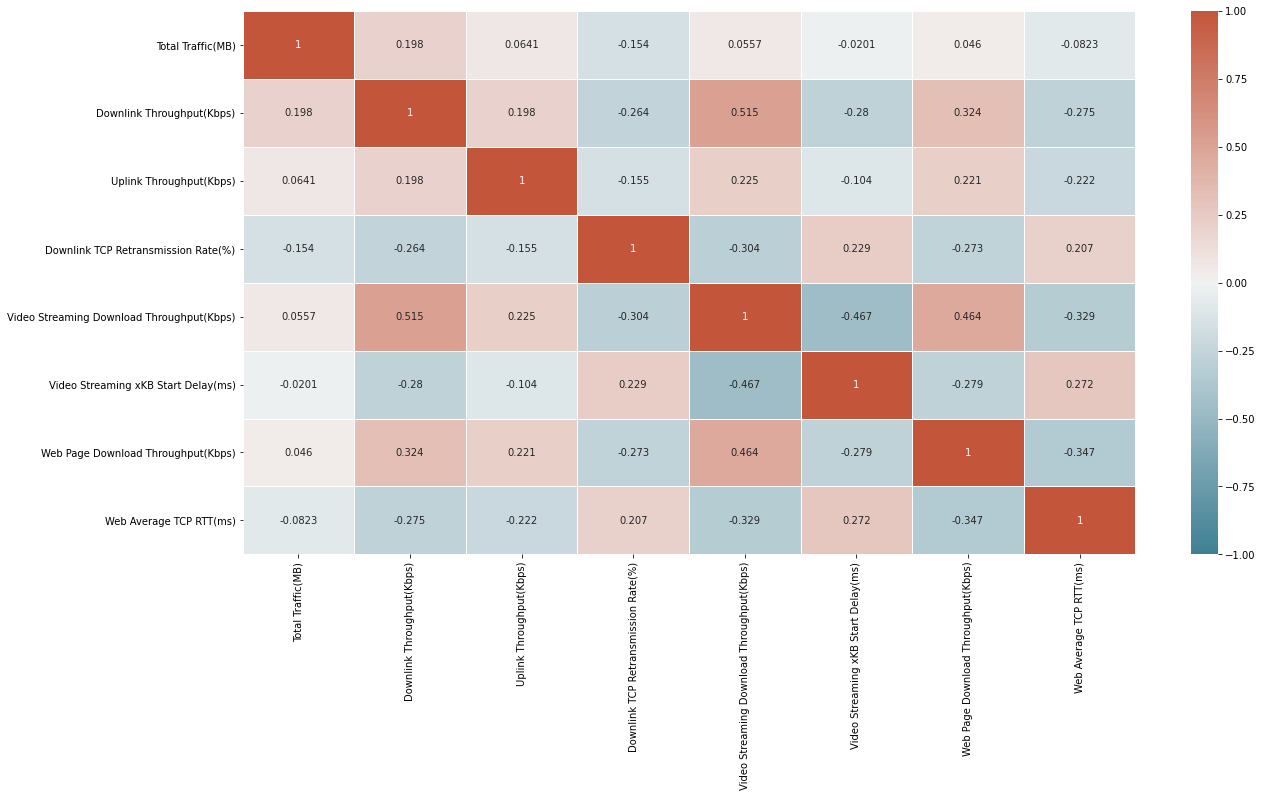

In [35]:
# Посмотрим на корреляцию между метриками:
corr = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(20, 10))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True,  fmt ='.3g', vmin=-1, vmax=1, center= 0, cmap = cmap, linewidth=.5)

**Промежуточный вывод:** Корреляционная матрица не выявила какой-либо сильной корреляции между рассматриваемыми метриками. Есть корреляция, близкая к среднему значению. Из наиболее значимого можно отметить (по шкале Чеддока):
* среднюю положительную корреляцию (0.515) между показателями скорости загрузки видео и общей скоростью загрузки к абоненту;
* положительную корреляцию, близкую к среднему значению (0.464), показателей скорости загрузки видео и скоростью загрузки web-страниц;
* отрицательную корреляцию, близкую к среднему значению (-0.467),между показателями скорости загрузки видео и задержкой старта воспроизведения видео;
* слабую корреляцию (-0.347) показателей скорости загрузки web-страниц и пингом при просмотре страницы.

В принципе, все найденные взаимосвязи легко объяснимы и не представляют из себя что-то аномальное. В любом случае можно сказать, что в наших данных не было обнаружено показателей, которые можно было бы объединить и исследовать как единую метрику.

**Также визуализируем распределение метрик в разрезе групп пользователей. Изобразим их в виде гистограмм с boxplot.**

In [36]:
#Создадим столбец для подписей графика:
df['group_names'] = ['довольные' if elem == 1 else 'недовольные' for elem in df['group']]

In [37]:
def draw_hist(col):
    fig = px.histogram(df, x= col, color="group_names", marginal="box", category_orders={"group_names":["довольные","недовольные"]})
    fig.update_layout(
        title='Распределение значений показателя {}'.format(col),
        xaxis_title="Значение",
        yaxis_title="Частота",
        legend_title="Группы пользователей",
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="RebeccaPurple")
    )

    fig.show()

In [38]:
for c in numeric_cols:
    draw_hist(c)

**Вывод по разделу:** построенные выше графики позволяют визуально оценить распределение данных в разрезе 2-х групп абонентов Мегафона. Можно заметить, что по ряду метрик наблюдается разница в распределении данныхв разрезе групп, что может свидетельствовать о существенных различиях между значениями показателей для довольных и недовольных клиентов. 

К таким показателям можно отнести:
* Downlink Throughput(Kbps) (средняя скорость к абоненту, визуально больше для группы довольных клиентов);
* Downlink TCP Retransmission Rate(%) (частота переотправка пакетов к абоненту, больше для группы недовольных);
* Video Streaming Download Throughput(Kbps) (скорость загрузки потокового видео, чуть больше для группы довольных);
* Video Streaming xKB Start Delay(ms) (задержка воспроизведения видео, выше для недовольной группы абонентов);
* Web Average TCP RTT(ms) (пинг при просмотре web-страниц, выше для недовольных).


Также незначительная разница в распределении видна для 'Web Page Download Throughput(Kbps)' (скорость загрузки веб-страниц, чуть выше для довольных). 

При этом распределения "Uplink Throughput"и "Total traffic" выглядит примерно одинаково для обеих групп. Показатель скорости передачи данных от абонента скорее всего несильно влияет на степень его удовлетворенностью услугами компании. Это логично, поскольку пользователю более интересна скорость загрузки к нему, чем от него. Есть смысл исключить данный показатель из дальнейшего изучения.
С показателем "Total traffic" не всё так однозначно.Он характеризует в первую очередь не сколько качество предоставления услуг компанией, сколько степень использования этих услуг конкретным пользователем. По взгляду на график создается впечатление, что обе группы (довольные и недовольные) примерно одинаково пользуются мобильным интернетом и их объем трафика не зависит от степени их удовлетворенности усугами компании. 

Есть смысл это перепроверить с помощью статистического теста, потому что разная степень использования услугами компании может сильно влиять на интерес конкретного пользователя к какой-либо характеристике/метрике качества услуг компании.  Человеку активно пользующемуся интернетом будет интересен показатель скорости к абоненту, в то время как пользователю, купившему симку компании чисто для звонков (на старом кнопочном телефоне, например), такой показатель будет совсем неинтересен. Тогда разность в степени ползования услугами компании в разрезе довольных/недовольных может привести к необходимости дополнительного дробления этих на более мелкие для их сопоставимости. В то время как примерно одинаковые значения показателя общего трафика говорит о том, что группы можно спокойно сравнивать, поскольку они однородны и сопоставимы.

# 3. Формулирование гипотез и статистические тесты

Для выбора статистического теста проверки гипотез необходимо, для начала, убедиться в том, что распределение метрик не является нормальным (гауссовским), как мы предположили исходя из визуального осмотра распределения показателей на графиках выше.

## 3.1 Оценка нормальности распределения показателей

*Используем для этого критерий Шапиро-Уилка. Он является одним наиболее эффективных критериев проверки нормальности. Критерий Шапиро-Уилка основан на оптимальной линейной несмещённой оценке дисперсии к её обычной оценке методом максимального правдоподобия.* 

**Сформулируем наши гипотезы для критерия:**
    
H0 - метрика распределена нормально;

H1- метрика имеет распределение, отличное от нормального.

In [39]:
# Проверим гипотезы сразу для всех показателей:
for metric in df[numeric_cols]:
    data = df[metric]
    stat, p = shapiro(data)
    print(metric, ':')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05 #здесь и далее уровень значимости примем за 0.05
    if p > alpha:
        print('Метрика распределена нормально')
    else:
        print('Скорее всего метрика имеет распределение, отличное от нормального')
    print('--------------------------------------')

Total Traffic(MB) :
Statistics=0.937, p=0.000
Скорее всего метрика имеет распределение, отличное от нормального
--------------------------------------
Downlink Throughput(Kbps) :
Statistics=0.825, p=0.000
Скорее всего метрика имеет распределение, отличное от нормального
--------------------------------------
Uplink Throughput(Kbps) :
Statistics=0.842, p=0.000
Скорее всего метрика имеет распределение, отличное от нормального
--------------------------------------
Downlink TCP Retransmission Rate(%) :
Statistics=0.839, p=0.000
Скорее всего метрика имеет распределение, отличное от нормального
--------------------------------------
Video Streaming Download Throughput(Kbps) :
Statistics=0.907, p=0.000
Скорее всего метрика имеет распределение, отличное от нормального
--------------------------------------
Video Streaming xKB Start Delay(ms) :
Statistics=0.798, p=0.000
Скорее всего метрика имеет распределение, отличное от нормального
--------------------------------------
Web Page Download Th

**Промежуточный вывод:** Таким образом, мы окончательно убедились в том, что распределение метрик не является гауссовым. Тогда использовать параметрические методы проверки гипотез нельзя. Остаются только непараметрические методы и бутстрэп.

Из непараметрических методов воспользуеся двумя:
* U-критерием Манна-Уитни и
* критерием Колмогорова-Смирнова.

## 3.2 Определение степени влияния метрик на удовлетворенность услугами компании

**Для начала сравним значение выбранных мерик в разрезе групп довольные/недовольные (т.е. по ответу на первый вопрос)**

**Озвучим гипотезы сразу для всех метрик:**

*По научному:*

H0 - распределение метрики одинаково для обеих групп абонентов;

H1- распределение метрики статистически значимо отличается в разных группах абонентов.

*По смыслу:*

H0 - величина метрики не оказывает влияние на удовлетворенность услугами компании;

H1 - величина метрики влияет на оценку пользователем качества услуг компании.

**U-критерий Манна-Уитни**

In [40]:
#Напишем общую функцию:
def U_statest(feature, data1, data2, alpha = 0.05):
#     data1 = df_a[feature]
#     data2 = df_b[feature]
    stat, p = mannwhitneyu(data1, data2)
    print('U-критерий по метрике', feature,':')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > alpha:
        print('Одинаковое распределение метрики (H0 не отвергается)')
    else:
        print('Разное распределение метрики (H1 принимается)')
    print('----------------------------------')    

In [41]:
#Определим метрики для анализа:
n_cols = ['Total Traffic(MB)',
 'Downlink Throughput(Kbps)',
 'Downlink TCP Retransmission Rate(%)',
 'Video Streaming Download Throughput(Kbps)',
 'Video Streaming xKB Start Delay(ms)',
 'Web Page Download Throughput(Kbps)',
 'Web Average TCP RTT(ms)']

In [42]:
#Создаем датасеты в разрезе групп:
df_a = df[df['group'] == 0].drop(columns = ['user_id', 'Q1', 'Q2','group'])
df_b = df[df['group'] == 1].drop(columns = ['user_id', 'Q1', 'Q2','group'])

In [43]:
#Применим функцию ко все метрикам из списка:
for col in n_cols:
    data1 = df_a[col]
    data2 = df_b[col]
    U_statest(col, data1, data2)

U-критерий по метрике Total Traffic(MB) :
Statistics=878186.000, p=0.205
Одинаковое распределение метрики (H0 не отвергается)
----------------------------------
U-критерий по метрике Downlink Throughput(Kbps) :
Statistics=758654.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Downlink TCP Retransmission Rate(%) :
Statistics=933153.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Video Streaming Download Throughput(Kbps) :
Statistics=749408.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Video Streaming xKB Start Delay(ms) :
Statistics=978880.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Web Page Download Throughput(Kbps) :
Statistics=737397.000, p=0.000
Разное распределение метрики (H1 принимается)
-------------------

**Тест Колмогорова-Смирнова**

In [44]:
#Напишем функцию для проверки с помощью теста Колмогорова-Смирнова:
def KS_statest(feature, data1, data2, alpha = 0.05):
#     data1 = df_a[feature]
#     data2 = df_b[feature]
    stat, p =  ks_2samp(data1, data2)
    print('Тест Колмогорова-Смирнова по метрике', feature,':')
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > alpha:
        print('Одинаковое распределение метрики (H0 не отвергается)')
    else:
        print('Разное распределение метрики (H1 принимается)')
    print('----------------------------------')   

In [45]:
#Применим функцию ко все метрикам из списка:
for col in n_cols:
    data1 = df_a[col]
    data2 = df_b[col]
    KS_statest(col, data1, data2)

Тест Колмогорова-Смирнова по метрике Total Traffic(MB) :
Statistics=0.037, p=0.358
Одинаковое распределение метрики (H0 не отвергается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink Throughput(Kbps) :
Statistics=0.091, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink TCP Retransmission Rate(%) :
Statistics=0.075, p=0.002
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Video Streaming Download Throughput(Kbps) :
Statistics=0.101, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Video Streaming xKB Start Delay(ms) :
Statistics=0.109, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Web Page Download Throughput(Kbps) :
Statistics=0.111, p=0.000
Разно

**Промежуточный вывод:** Для начала стоит отметить, что мы окончательно убедились в однородности групп по показателю "Total traffic", что позволяет нам сравнивать группы довольных/недовольных без необходимости дробить их на дополнительные группы по степени использования услуг компании. Остальные сравниваемые в разрезе групп метрики показали статистически значимые отличия в разрезе групп, т.е. показатели 'Downlink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)', 'Video Streaming Download Throughput(Kbps)', 'Video Streaming xKB Start Delay(ms)', 'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)' в разных группах дейстивтельно отличаются. Для Мегафона такая информация представляет интерес, поскольку это позволит компании выявить значения показателей, которые приводят к неудовлетворенности или, наоборот, удовлетворенности пользователей услугами компании.

**Также запустим бустстреп и визиализируем доверительные интервалы для выбранной группы показателей на графике.** 

In [46]:
#Напишем функцию для многократной симуляции эксперимента посредством бутсрепа:
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean): #пускай к-во повторов будет 1000, а к-во экземпляров в сэмпле - 100.
    res = []
    n = max(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res

In [47]:
#Будем рисовать график посредством Distplot, поэтому уберем warnings для красоты:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
#Функция для отрисовки графика распределения средних для 2-исследуемых групп:
def draw_boot_hist(data1, data2, feature, group_name1, group_name2):
    #Возьмем сэмплы с помощью функции выше
    samples_a = bootstrap(data1[feature],N_TRIAL = 1000)
    samples_b = bootstrap(data2[feature],N_TRIAL = 1000)
    samples_a = np.array(samples_a)
    samples_b = np.array(samples_b)
    
    #Нарисуем, что получилось:
    ax = sns.distplot(samples_a,label = '{}'.format(group_name1), color = '#367588')
    sns.distplot(samples_b,ax = ax,label = '{}'.format(group_name2), color = '#FD7C6E')
    
    #Для уровня значимости 5% и, следовательно, уровня доверия 95%, доверительный интервал будет такой:
    ax.axvline(np.percentile(samples_a,2.5),linestyle = '--',color='#367588', 
               label = 'доверительный интервал, {}'.format(group_name1))
    ax.axvline(np.percentile(samples_a,97.5),linestyle = '--',color='#367588')

    ax.axvline(np.percentile(samples_b,2.5),linestyle = '--',color='#FD7C6E', 
               label = 'доверительный интервал, {}'.format(group_name2))
    ax.axvline(np.percentile(samples_b,97.5),linestyle = '--',color='#FD7C6E')

    ax.legend(bbox_to_anchor = (1.0, 1), title = 'Легенда')
    
    plt.title('Распределение средних значений выборок метрики {}'.format(feature))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    plt.show()

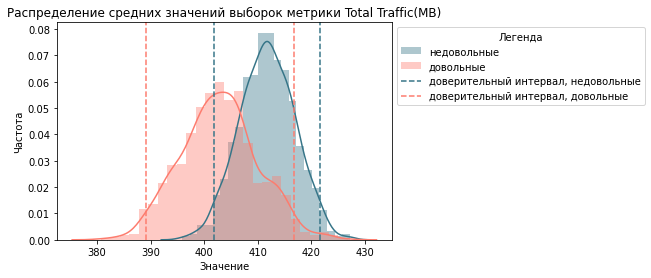

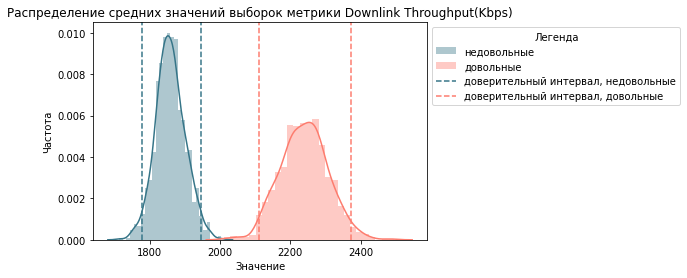

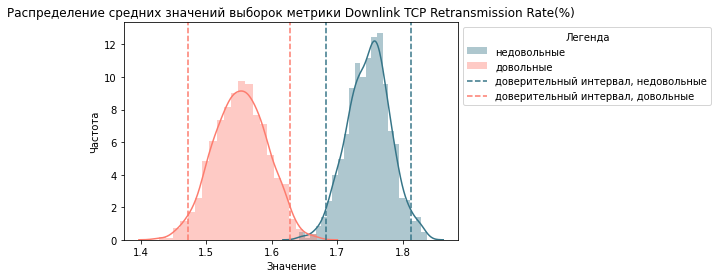

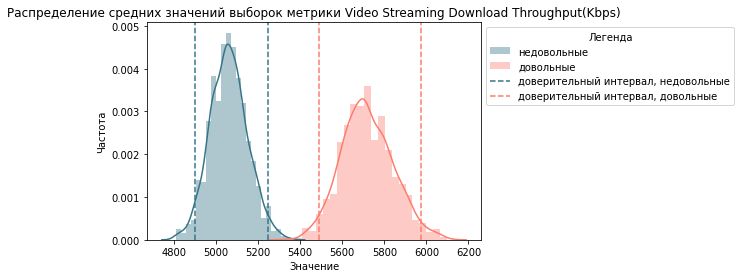

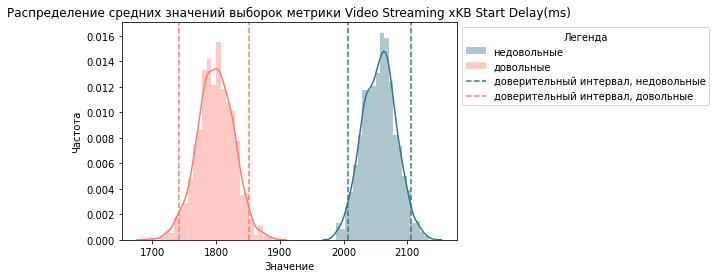

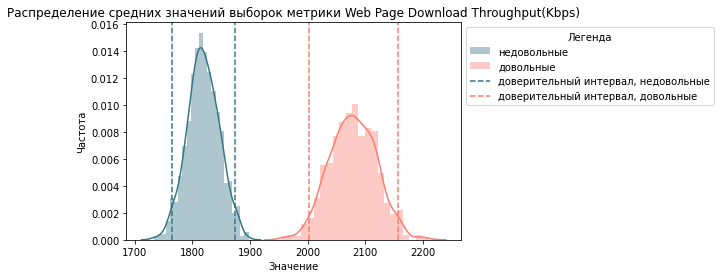

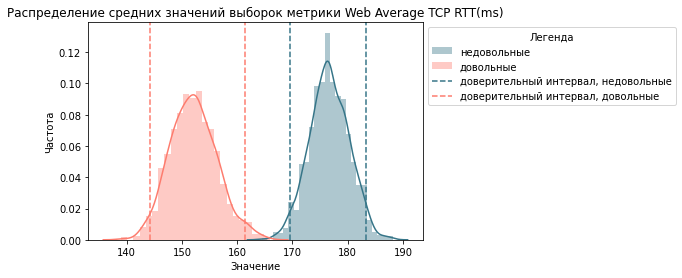

In [49]:
#Рисуем графики:
for col in n_cols:
    draw_boot_hist(df_a, df_b, col, 'недовольные', 'довольные')

In [50]:
#Также напишем функцию для построения гистограммы разниц средних и подсчета p-value:
def bootstrap_stats(feature, df1, df2, N_TRIAL = 1000,func = np.mean, alpha = 0.05):
    diffs = []
    
    arr1 = df1[feature]
    arr2 = df2[feature]
    
    n = max(len(arr1),len(arr1))
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        subsample1 = np.random.choice(arr1, size = (n,))
        subsample2 = np.random.choice(arr2, size = (n,))
        # рассчитываем статистику
        stat1 = func(subsample1)
        stat2 = func(subsample2)
        diffs.append(stat1-stat2)
    diffs = pd.DataFrame(diffs)
    
    # Границы доверительного интервала:
    lower_b = np.percentile(diffs,2.5)
    upper_b = np.percentile(diffs,97.5)
    conf_interval = [lower_b, upper_b]
    
    
    # P-value:
    a = norm.cdf(x = 0, loc = func(diffs), scale = np.std(diffs))
    b = norm.cdf(x = 0, loc = -func(diffs), scale = np.std(diffs))
    p_value = min(a, b) * 2
    
    #Интерпретация:
    
    if p_value > alpha:
         a_text = 'Одинаковое распределение метрики (H0 не отвергается)'
    else:
        a_text = 'Разное распределение метрики (H1 принимается)'
    
    
    #Визуализация разниц:
    ax = sns.distplot(diffs[0], color = '#047553')
    
#     ax.axvline(lower_b,linestyle = '--',color='r', label = 'нижняя граница интервала')
#     ax.axvline(upper_b,linestyle = '--',color='g', label = 'верхняя граница интервала')
    
    for p in ax.patches:
        if (p.get_x() > upper_b) | (p.get_x() < lower_b):
            p.set_color('#34403e')
        else:
            p.set_color('#047553')
            
        
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title('Гистограмма распределения разниц средних метрики {}'.format(feature))
    plt.show()
       
    print ("Границы доверительного интервала: ", conf_interval, "\np_value = " , round(p_value[0],3), '->', a_text)

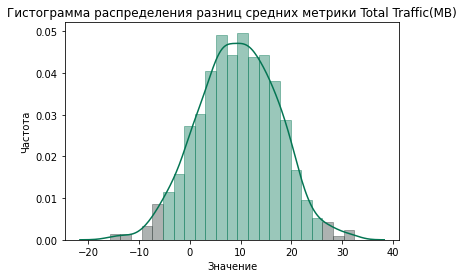

Границы доверительного интервала:  [-5.849589319562765, 24.30584356714933] 
p_value =  0.226 -> Одинаковое распределение метрики (H0 не отвергается)


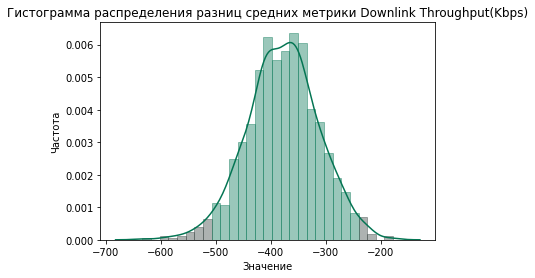

Границы доверительного интервала:  [-507.4066024985805, -253.24779628052224] 
p_value =  0.0 -> Разное распределение метрики (H1 принимается)


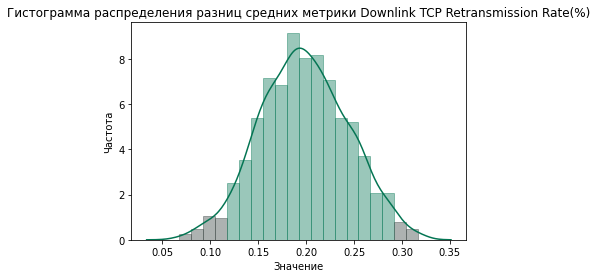

Границы доверительного интервала:  [0.11078080636002276, 0.286853066439523] 
p_value =  0.0 -> Разное распределение метрики (H1 принимается)


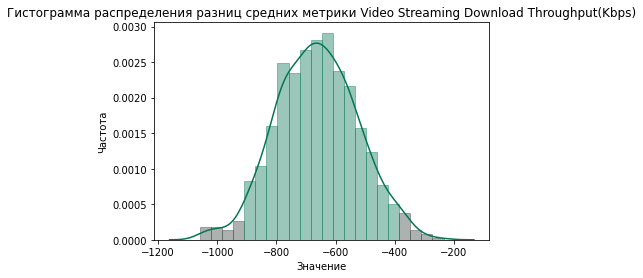

Границы доверительного интервала:  [-916.8567852072687, -386.8938563316294] 
p_value =  0.0 -> Разное распределение метрики (H1 принимается)


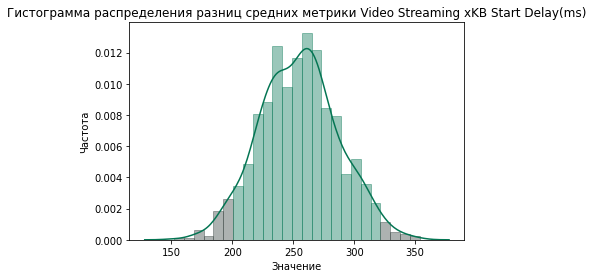

Границы доверительного интервала:  [193.11636854060194, 318.6358177172061] 
p_value =  0.0 -> Разное распределение метрики (H1 принимается)


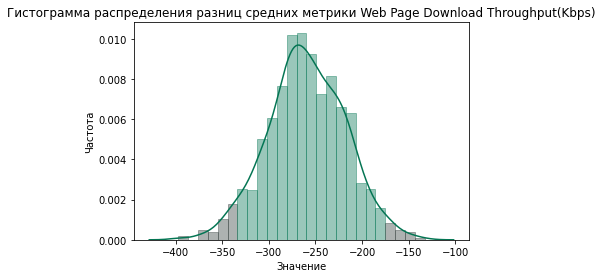

Границы доверительного интервала:  [-342.3815393242477, -179.37873381601355] 
p_value =  0.0 -> Разное распределение метрики (H1 принимается)


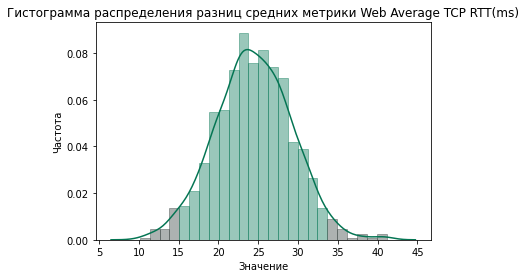

Границы доверительного интервала:  [14.732808063600233, 33.66700738216921] 
p_value =  0.0 -> Разное распределение метрики (H1 принимается)


In [51]:
for col in n_cols:
    bootstrap_stats(feature = col, df1 = df_a, df2 = df_b)

**Промежуточный вывод:** Бутстреп окончательно подтвердил сделанные нами ранее выводы. По порядку пройдемся по показателям и интерпретируем результаты тестов по ним.
* Total Traffic(MB), объем трафика передачи данных, не имеет существенного отличия для недовольных и довольных пользователей, что говорит о примерно одинаковом использовании трафика обеими группами;

*  Downlink Throughput(Kbps), средняя скорость «к абоненту», у группы довольных наблюдаются больше высоких значений, по сравнению с группой недовольных, т.е. у сравниваемых групп действительно есть разница в средней скорости связи;

* Downlink TCP Retransmission Rate(%), частота переотправок пакетов «к абоненту», в группе недовольных зачастую оказывалась выше, чем в группе довольных, что, естественно, негативно повлияло на скорость и качество связи, и привело к негативны отзывам;

* Video Streaming Download Throughput(Kbps), скорость загрузки потокового видео, для группы довольных в целом была выше;

* Video Streaming xKB Start Delay(ms), задержка старта воспроизведения видео - в группе недовольных показатель больше, что также повлияло на неблагоприятную оценку пользователей;

* Web Page Download Throughput(Kbps), скорость загрузки web-страниц через браузер, также показывала более высокие значения у довольной группы;

* Web Average TCP RTT(ms), пинг при просмотре web-страниц -  в группе недовольных значения показателя были выше, чем у довольных.

## 3.3 Изучение величин показателей в разрезе оценки по первому вопросу

Конкретная оценка качества услуг компании, представленная в качестве ответа на первый вопрос опроса, позволяет нам оценить разницу в показателях при увеличении или уменьшении оценки на 1 пункт. Таким образом можно, например, понять где находится граница, которая отделяет высокие и низкие оценки от средних. Также подобный анализ может выявить какие показатели меняюются при изменении оценки в первую очередь или, если точнее, какие изменения конкретной характеристики привели к изменению оценки. 

Попробуем оценить, насколько сильно отличаются группы показателей при различных оценках и где находится верхняя и нижняя граница оценочного интервала, т.е. какая оценка фактически отделяет группу полностью удовлетворенных (высокая оценка) от частично удовлетворенных (средняя оценка), а какая - вторую группу от совсем неудовлетворенных (низкая оценка).

In [52]:
#Создадим отдельный df под каждый из ответов на вопрос Q1:
q10 = df[df['Q1'] == 10]
q9 = df[df['Q1'] == 9]
q8 = df[df['Q1'] == 8]
q7 = df[df['Q1'] == 7]
q6 = df[df['Q1'] == 6]
q5 = df[df['Q1'] == 5]
q4 = df[df['Q1'] == 4]
q3 = df[df['Q1'] == 3]
q2 = df[df['Q1'] == 2]
q1 = df[df['Q1'] == 1]

#Т.к. мы убрали часть строк-выбросов из начального датасета, к-во ответов на вопрос немного изменилось 
#Поэтому еще раз выведем на экран количество строк для каждого из датасетов:
ques = [q1, q2, q3, q4, q5, q6, q7, q8, q9, q10]

for q in ques:
    print(q.shape[0])

466
150
296
104
210
89
184
262
211
758


Некоторые варианты ответов практически достигли 800 экземпляров, в то время как другие оказались даже меньше 100. При этом заметно, что больше всего оценок пришлось на самый высокий и самый низкий баллы. Возможно это связано с тем, что не все оценки были польностью объективны, т.е. что-то было оценено "на эмоциях".
В любо случае, учитывая сильный разброс в количестве значений, логичнее будет для сравнения средних групп воспользоваться именно бутсрэпом, чтобы сгладить эту количественную разницу.

Чтобы найти верхнюю границу оценок, т.е. переход от не совсем довольных в категорию довольных, начнем последовательно сравнивать группы с оценкой 9 и ниже, с группой, поставившей оценку 10 из 10.

In [53]:
#Напишем функцию, которая будет возвращать значения p-value:
def p_calc(feature, df1, df2, N_TRIAL = 1000,func = np.mean, alpha = 0.05):
    diffs = []
    
    arr1 = df1[feature]
    arr2 = df2[feature]
    
    n = max(len(arr1),len(arr1))
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        subsample1 = np.random.choice(arr1, size = (n,))
        subsample2 = np.random.choice(arr2, size = (n,))
        # рассчитываем статистику
        stat1 = func(subsample1)
        stat2 = func(subsample2)
        diffs.append(stat1-stat2)
    diffs = pd.DataFrame(diffs)
    
    # P-value:
    a = norm.cdf(x = 0, loc = func(diffs), scale = np.std(diffs))
    b = norm.cdf(x = 0, loc = -func(diffs), scale = np.std(diffs))
    p_value = min(a, b) * 2
    
    return p_value

In [54]:
#Сравним группы с оценками от 1 до 9 с группой, поставившей оценку отлично:

for metric in n_cols[1:]: #для всех метрик, кроме использования трафика
    print(metric)
    p_vals = [] #пустой список для записи p-value
    interprets = [] #пустой список для записи их интерпретации
    for q in ques[:9]: #для всех данных, сгруппированных по ответу на вопрос 1
        p = p_calc(metric, q10, q, N_TRIAL = 1000, alpha = 0.05)[0] #сравниваем все группы с "отличниками" 
        p = round(p, 3) #округлим
        p_vals.append(p)
        
        if p > 0.05:
        #Распределения отличаются?
            a_text = 'нет'
        else:
            a_text = 'да'
        interprets.append(a_text)
              
    print('Значения p-value:')    
    print(p_vals)
    print('Распределения различны?')
    print(interprets)
    print('------------') #для читаемости

Downlink Throughput(Kbps)
Значения p-value:
[0.0, 0.0, 0.0, 0.001, 0.0, 0.651, 0.006, 0.413, 0.051]
Распределения различны?
['да', 'да', 'да', 'да', 'да', 'нет', 'да', 'нет', 'нет']
------------
Downlink TCP Retransmission Rate(%)
Значения p-value:
[0.001, 0.0, 0.0, 0.064, 0.007, 0.304, 0.226, 0.613, 0.189]
Распределения различны?
['да', 'да', 'да', 'нет', 'да', 'нет', 'нет', 'нет', 'нет']
------------
Video Streaming Download Throughput(Kbps)
Значения p-value:
[0.0, 0.027, 0.0, 0.0, 0.0, 0.936, 0.564, 0.424, 0.987]
Распределения различны?
['да', 'да', 'да', 'да', 'да', 'нет', 'нет', 'нет', 'нет']
------------
Video Streaming xKB Start Delay(ms)
Значения p-value:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.001, 0.006, 0.13]
Распределения различны?
['да', 'да', 'да', 'да', 'да', 'да', 'да', 'да', 'нет']
------------
Web Page Download Throughput(Kbps)
Значения p-value:
[0.0, 0.075, 0.0, 0.0, 0.0, 0.325, 0.143, 0.184, 0.483]
Распределения различны?
['да', 'нет', 'да', 'да', 'да', 'нет', 'нет', 'не

In [55]:
#Сохраним всё вышеперечисленное в датафрейм (для визуализации):
metrics = [] #пустой список для записи метрик
p_vals = [] #пустой список для записи p-value
qs = []

for metric in n_cols[1:]: #для всех метрик, кроме использования трафика
    metrics += [metric]*len(ques[:9]) #забъем столбец метрикой
    for i, q in enumerate(ques[:9]): #для всех данных, сгруппированных по ответу на первый вопрос
        qs.append(i+1)# добавим в список числовую оценку
        p = p_calc(metric, q10, q, N_TRIAL = 1000, alpha = 0.05)[0] #сравниваем все группы с "отличниками" 
        p = round(p, 3) #округлим до третьего знакапосле запятой
        p_vals.append(p)

In [56]:
#Датафрейм:        
zips = list(zip(metrics, qs, p_vals)) #объединим получившиеся списки
comparison = pd.DataFrame(zips, columns=['Метрика', 'Оценка', 'p-value']) #создадим df
#Немного изменим его форму. Пускай метрики будут в виде столбцов:
comparison = comparison.pivot(index = 'Оценка', columns = 'Метрика', values = 'p-value')
#Уберем лишнее название и создадим новый индекс:
comparison.columns.name = None
comparison.reset_index(inplace=True)
comparison #посмотрим на результат

Оценка  Downlink TCP Retransmission Rate(%)  Downlink Throughput(Kbps)   
0       1                                0.001                      0.000  \
1       2                                0.000                      0.000   
2       3                                0.000                      0.000   
3       4                                0.068                      0.001   
4       5                                0.007                      0.000   
5       6                                0.281                      0.660   
6       7                                0.197                      0.008   
7       8                                0.545                      0.400   
8       9                                0.207                      0.065   

   Video Streaming Download Throughput(Kbps)   
0                                      0.000  \
1                                      0.030   
2                                      0.000   
3                                      0.000   
4                                      0.000   
5                                      0.991   
6                                      0.552   
7                                      0.405   
8                                      0.949   

   Video Streaming xKB Start Delay(ms)  Web Average TCP RTT(ms)   
0                                0.000                    0.000  \
1                                0.000                    0.000   
2                                0.000                    0.000   
3                                0.000                    0.205   
4                                0.000                    0.001   
5                                0.005                    0.733   
6                                0.000                    0.311   
7                                0.008                    0.963   
8                                0.151                    0.403   

   Web Page Download Throughput(Kbps)  
0                               0.000  
1                               0.072  
2                               0.000  
3                               0.000  
4                               0.000  
5                               0.352  
6                               0.132  
7                               0.217  
8                               0.515

In [57]:
#График для всех оценок:

metrics = n_cols[1:]

paper = go.Figure()

for m in metrics: #отрисуем сразу все графики, но скроем их
    paper.add_trace(
        go.Bar(x = comparison['Оценка'], 
               y = comparison[m], 
               marker=dict(color = comparison['Оценка'], colorscale='viridis'),
               visible=False,
               name = m
        )
    )

steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data[:6])):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]} # настроим "показ" графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True

shapes = [
{'type': 'line','x0': 1,'y0': 0.05,
'x1': 10,'y1' : 0.05,'line': {'color': 'green','width': 2, 'dash':'dash'}}]
            

            
paper.update_layout(
    title={'text': 'Значения p-value для показателя {} для всех оценок по сравнению с 10'.format(paper.data[start_index].name)},
#     yaxis_range=[0, 1],
    xaxis_range=[1, 10], 
    yaxis_dtick=0.1,
    xaxis_dtick=1,
    yaxis_title = 'p-value',
    xaxis_title = 'оценка',
    shapes = shapes,
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

In [58]:
#График для оценок 6-9:

metrics = n_cols[1:]

paper = go.Figure()

for m in metrics: #отрисуем сразу все графики, но скроем их
    paper.add_trace(
        go.Bar(x = comparison[5:]['Оценка'], 
               y = comparison[5:][m], 
               marker=dict(color = comparison[5:]['Оценка'], colorscale='viridis'),
               visible=False,
               name = m
        ))
    
steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data[:6])):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]} # настроим "показ" графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True

# paper.add_hline(y=0.05, line_width=3, line_dash="dash", line_color="green", annotation_text="граница p_value")
shapes = [
{'type': 'line','x0': 5,'y0': 0.05,
'x1': 10,'y1' : 0.05, "name":"граница p_value",'line': {'color': 'green','width': 2, 'dash':'dash'}}]

paper.update_layout(
    title={'text': 'Значения p-value для показателя {} для ряда оценок по сравнению с 10'.format(paper.data[start_index].name)},
    xaxis_range=[5.5, 9.5], 
#     yaxis_range=[0, 1], 
    yaxis_dtick=0.1,
    xaxis_dtick=1,
    yaxis_title = 'p-value',
    xaxis_title = 'оценка',
    shapes = shapes,
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

**Гипотеза 1:**  Примененная функция бутсрэпа не выявила существенных отличий между группами с оценкой 10 и 9. Это может свидетельствовать о том, что по своей сути это одна группа, что подтвердило бы оправданность их классфикации аналитиками Мегафона в группу "полностью удовлетворенных" (в плане отсутствия отправки таким пользователям вопроса по поводу отмечаемых ими недостатков). Проверим это, посмотрев на графическое распределение значений всех показателей в разрезе этих двух групп оценок.

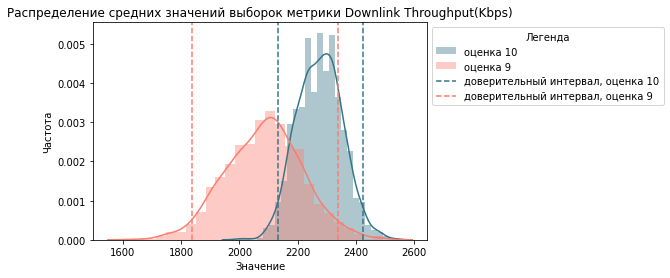

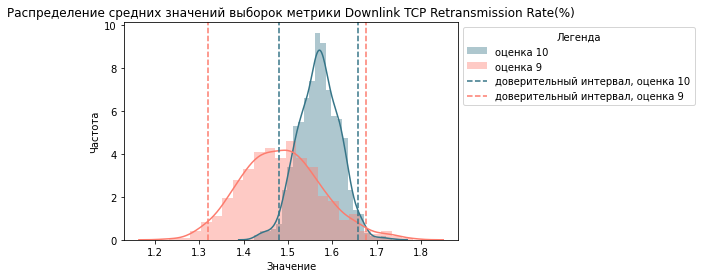

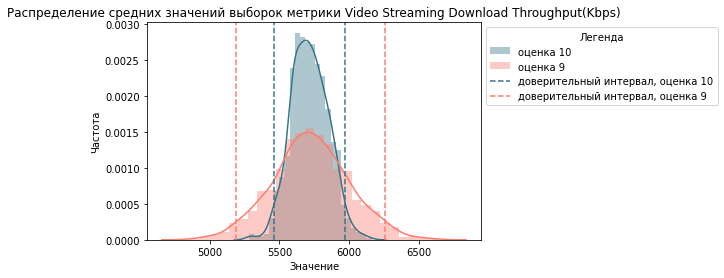

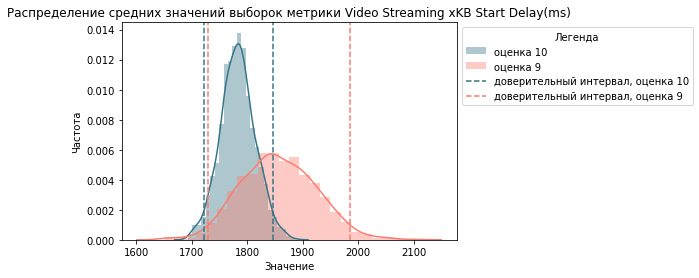

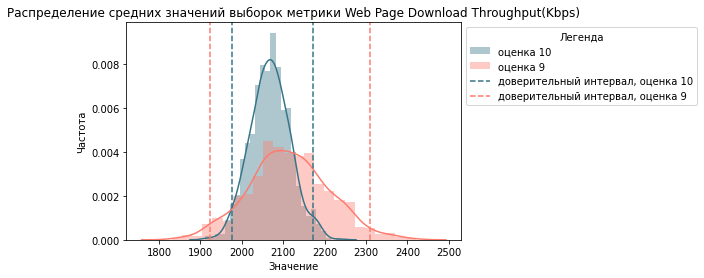

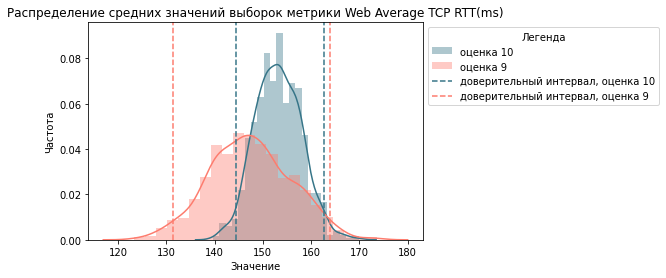

In [59]:
#Сравним группы 10 и 9 по всем показателям:
for col in n_cols[1:]:
    draw_boot_hist(q10, q9, col, 'оценка 10', 'оценка 9')

**Результаты проверки гипотезы 1:** 

Графики распределения средних по группам показали, что доверительные интервалы данных групп пересекаются. Однако, если внимательно изучить каждый график, то можно заметить, что распределения их средних имеют следующие особенности, характерные для всех исследуемых метрик:

1) графики функций у группы с оценкой 10 имеет более острую форму, с более высоким пиком;
2) графики для группы с оценкой 9 более вытянуты по оси абсцисс, имеют более вогнутую форму с менее резким пиком;
3) доверительные интервалы для группы с оценкой 10 либо польностью, либо практически польностью входят в доверительные интервалы для распределения средних группы с меньшей оценкой.

Эти особенности свидетельствуют о том, что группа "отличников" всё же отличается от группы с оценкой 9 в том плане, что имеет более узкий разброс значений, которые преимущественно разбросаны в более высоких диапазонах для метрик, большее значение которых благоприятно для пользователей, и в более низких диапазонах для метрик, высокое значение которых плохо сказывается на качестве связи и т.п. Это может говорить о том, что абоненты, полностью довольные услугами компании, имеют примерно одинаковые показатели метрик. Т.е. мы имеем некий эталонный разброс значений метрик, на основании которого можно уверенно прогнозировать вероятность вхождения конкретного пользователя в группу "отличников".

В то же время, пользователи с оценкой "9" имели гораздо более широкий доверительный интервал. Предположу две основные причины такого явления: 
а) в группе есть новые пользователи, еще не уверенно оценивающие услуги компании (сразу 10 из 10 поставить сложно) и 
б) в группе есть пользователи, которые принципиально не ставят оценку 10, несмотря на эталонные значения метрик (пользователи, следующие логике "мы довольны, но поставим 9, чтобы не расслаблялись и улучшали качество").

В итоге получается, что пользователи, поставившее 10 из 10 имеют четко определенный узкий набор значений. Это позволяет рассматривать эту группу, как некий эталон отличных (10/10) значений метрик. Стоит к тому же отметить, что пользователей, поставивших именно этот балл в выборке оказалось больше всего, что, безусловно, является хорошим знаком.

**Гипотеза 2:** В то же время, мы наблюдаем, что распределение значений показателей для пользователей с оценками 9 и 10 очень схожи с аналогичными для тех, кто оценил услуги на 8 баллов из 10. Единственное отличие между группой с 10 и 8 баллами оценки - показатель Video Streaming xKB Start Delay(ms), который для пользователей с более низкой оценкой, очевидно, был ниже. Но насколько это существенно с учетом того факта, что на медленную загрузку видео, согласно ответам на второй вопрос, жаловалось только 7% от всех недовольных пользователей? При этом заметно, что p_value для группы с оценкой 9 по тому же показателю также невысок (по сравнению с группой эталонных "отличников"). Это указывает на возможность отсутсвия существенных отличий между группами с оценкой 9 и 8. Проверим это ниже.

In [60]:
#Сравним группы 9 и 8 в разрезе интересующего показателя.
p1 = p_calc('Video Streaming xKB Start Delay(ms)', q9, q8, N_TRIAL = 1000, alpha = 0.05)[0]
p1 = round(p1, 3)
if p1 > 0.05:
    a_text = ('Значение p, равное {}, больше установленного уровня значимости. Одинаковое распределение метрики (H0 не отвергается).').format(p1)
else:
    a_text = ('Значение p, равное {}, меньше установленного уровня значимости. Разное распределение метрики (H1 принимается).').format(p1)
print(a_text)

Значение p, равное 0.537, больше установленного уровня значимости. Одинаковое распределение метрики (H0 не отвергается).


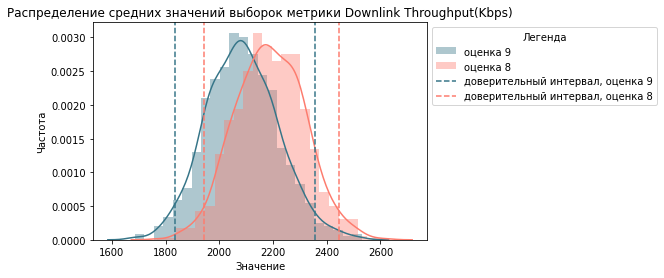

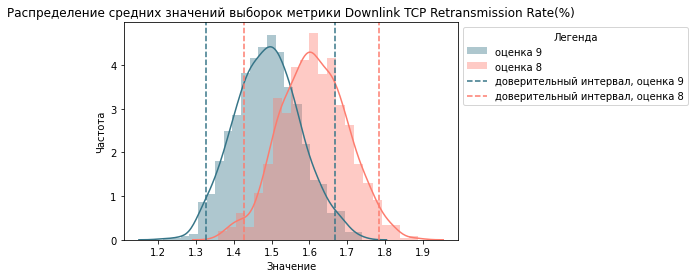

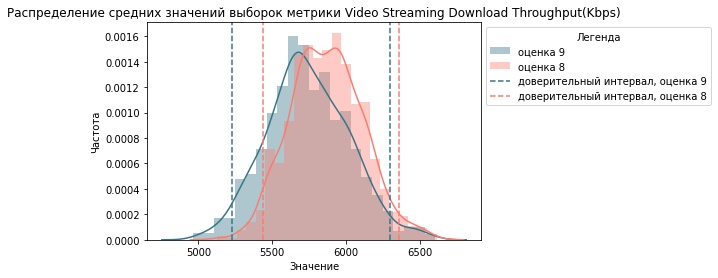

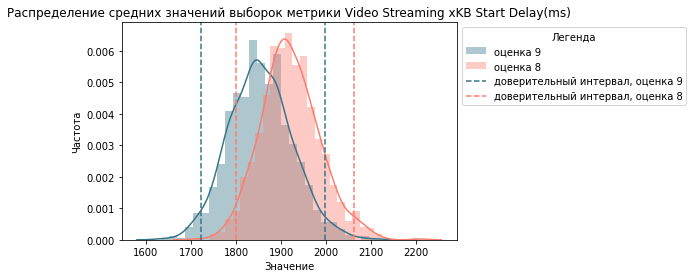

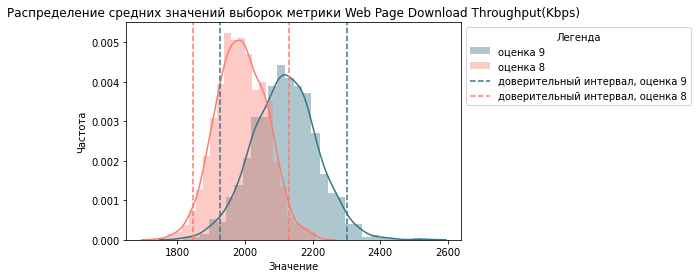

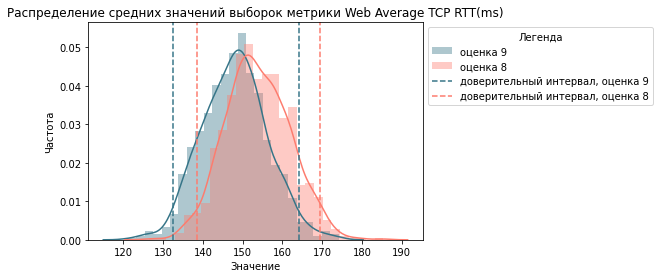

In [61]:
#Также нарисуем графики. Ради интереса посмотрим на все показатели сразу:
for col in n_cols[1:]:
    draw_boot_hist(q9, q8, col, 'оценка 9', 'оценка 8')

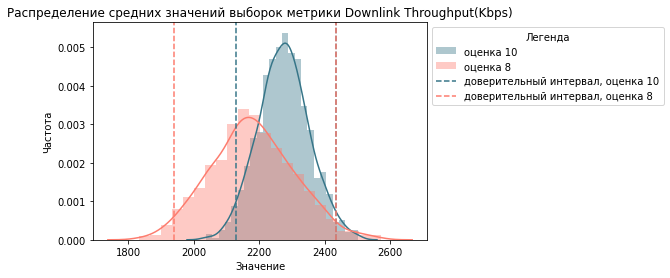

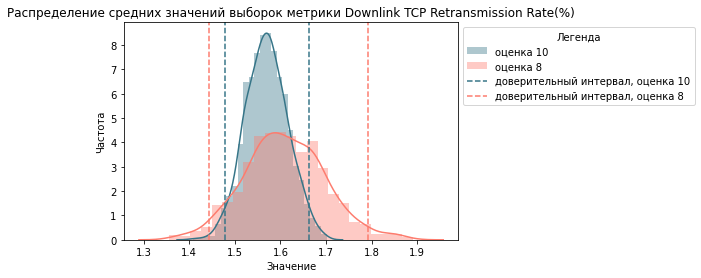

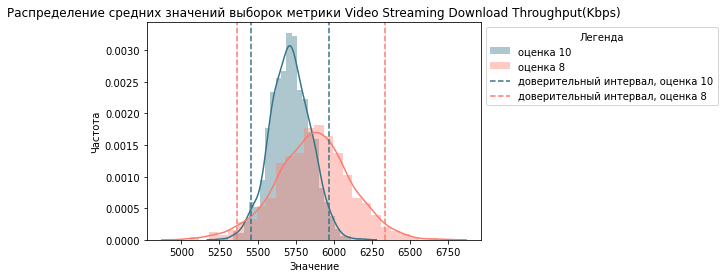

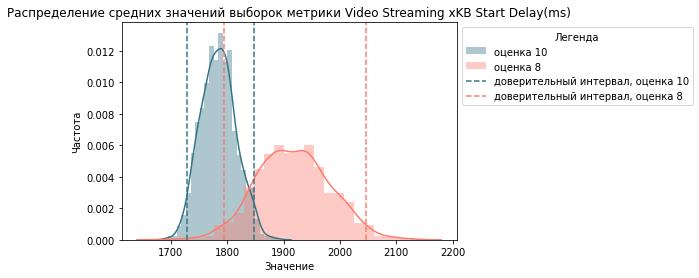

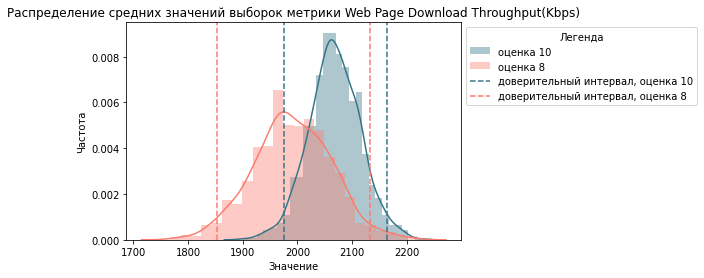

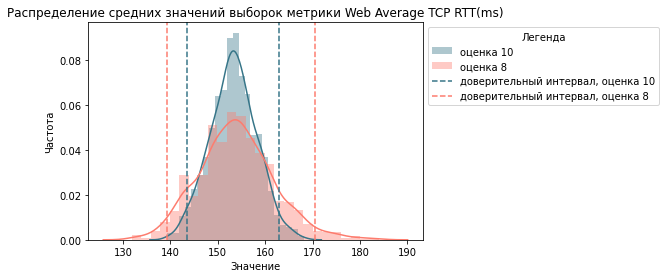

In [62]:
#В дополнение еще сравним группы с оценками 8 и 10:
for col in n_cols[1:]:
    draw_boot_hist(q10, q8, col, 'оценка 10', 'оценка 8')

**Результаты проверки гипотезы 2:**  
Действительно, между исследуемыми группами с оценками 9 и 8 нет существенного отличия. Этот факт указывает на возможность включения группы с оценкой 8 к группе полностью удовлетворенных пользователей. По графикам очень заметно, что распределения значений показателей для этих двух групп очень схожи. Также у пользователей с более низкой оценкой в ряде случаев было более высокое максимальное значение по показателям скорости загрузки (см. графики средней скорости "к абоненту", скорости загрузки видео). Получается, что значения показателей для оценки 8 и 9 даже более схожи, чем распределения тех же величин для групп 9 и 10. 

Если отдельно сравнить рапсределения показателей в разрезе оценок 10 и 8, то можно в очередной раз отметить, что группа "отличников" имеет гораздо более узкий доверительный интервал и более четкий пик. В этом плане показатели среди оценок 9 и 8 получились даже более схожими. 

Исходя из вышеперчисленного, можно сделать вывод, что между оценками 8 и 9 нет существенных отличий, в то время как оценка 10 всё-таки немного отличается в плане набора значений, что хорошо наблюдается на графике. Т.е. по своей сути 9 и 8 - эта одна оценка (некий аналог - 'хорошо'), в то время как 10 - однозначно отлично.

По этой логике группу с оценкой 8 можно было включить в группу "довольных" по результатам произведенного опроса и не присылать им второй вопрос.

**Гипотеза 3:** Если судить по резултатам сравнения всех оценок с "отличными" (10/10 баллов), то моментом перехода с оценки хорошо на оценку удовлетворительно является оценка 7. Для неё характерно существенное снижение значений показателя Downlink Throughput(Kbps) или средней скорости «к абоненту». Показатель задержки воспроизведения видео, при этом, тоже был ниже, чем для пользователей с оценкой 10. Выходит, что именно снижение данных двух показателей больше всего влияет на благоприятность оценки пользователя.
Однако, если внимательно посмотреть на значение показателя p по всем метрикам в привязке к оценке пользователей, можно заметить, что многие значения метрик для группы с оценкой 6 не имеют существенных отличий от группы с оценкой 10. Более того, значения ряда показателей (судя по величине p-value) для группы с оценкой 6 выше, чем аналогичные показатели для оценок 7, 8 и даже 9. 

Означает ли это, что наше суждение об отнесении пользователей, оценки которых составили 7 и ниже, к недовольным, ошибочно? Проверим это с графически, сравнив показатели для оценок с 8 по 6 включительно.

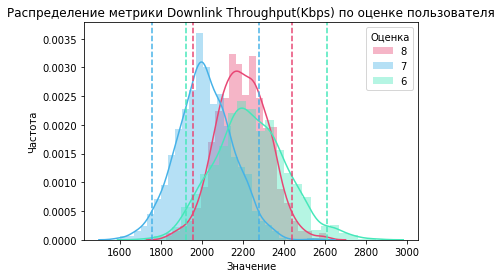

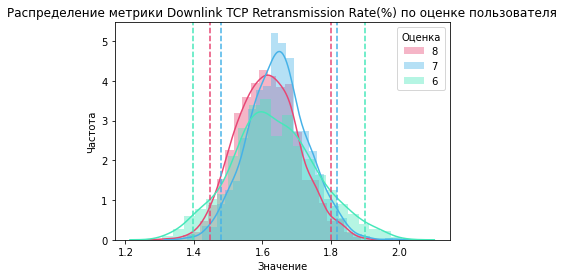

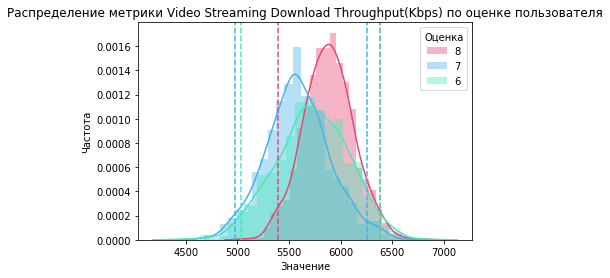

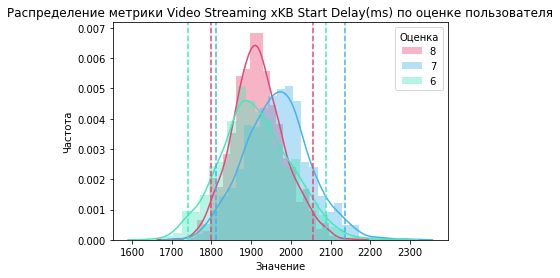

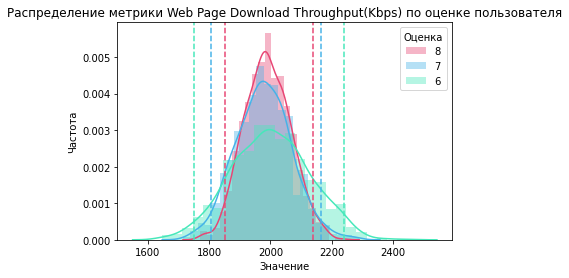

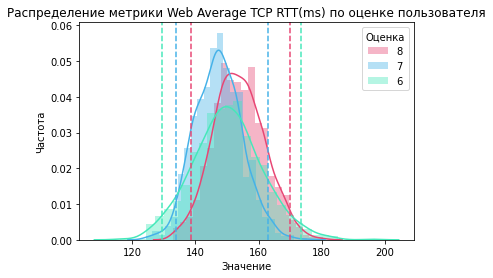

In [63]:
#Здесь изобразим все три группы - с оценками с 8 по 6:
for feature in n_cols[1:]:
    #Возьмем сэмплы
    samples_a = bootstrap(q8[feature],N_TRIAL = 1000)
    samples_b = bootstrap(q7[feature],N_TRIAL = 1000)
    samples_c = bootstrap(q6[feature],N_TRIAL = 1000)
    
    
    samples_a = np.array(samples_a)
    samples_b = np.array(samples_b)
    samples_c = np.array(samples_c)

   
    #Нарисуем, что получилось:
    ax = sns.distplot(samples_a,label = '8', color = '#e84674')
    sns.distplot(samples_b,ax = ax,label = '7', color = '#46b2e8')
    sns.distplot(samples_c,ax = ax,label = '6', color = '#46e8ba')

    
    #Для уровня значимости 5% и, следовательно, уровня доверия 95%, доверительный интервал будет такой:
    ax.axvline(np.percentile(samples_a,2.5),linestyle = '--',color='#e84674')
    ax.axvline(np.percentile(samples_a,97.5),linestyle = '--',color='#e84674')

    ax.axvline(np.percentile(samples_b,2.5),linestyle = '--',color='#46b2e8')
    ax.axvline(np.percentile(samples_b,97.5),linestyle = '--',color='#46b2e8')

    ax.axvline(np.percentile(samples_c,2.5),linestyle = '--',color='#46e8ba')
    ax.axvline(np.percentile(samples_c,97.5),linestyle = '--',color='#46e8ba')
    

    ax.legend(bbox_to_anchor = (1.0, 1), title = 'Оценка')
    
    plt.title('Распределение метрики {} по оценке пользователя'.format(feature))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    plt.show()

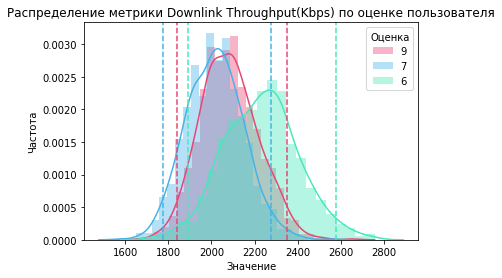

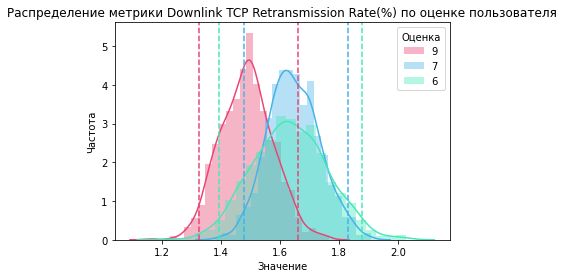

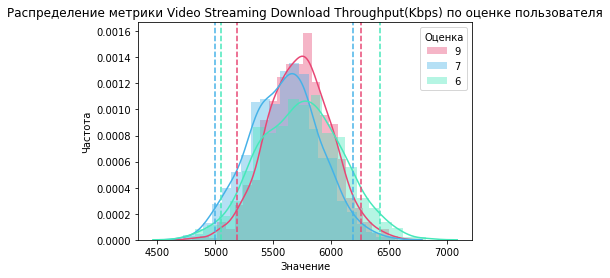

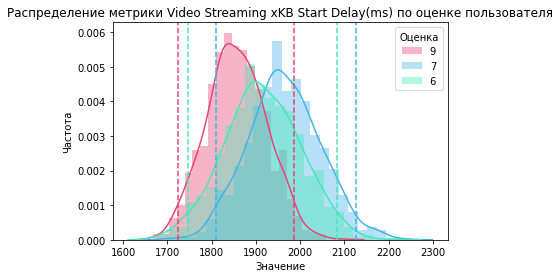

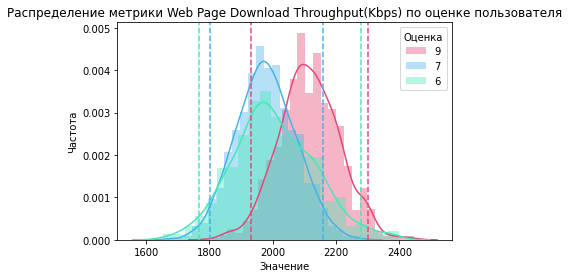

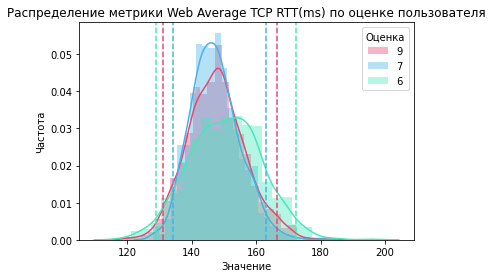

In [64]:
#Также посмотрим еще три группы - с оценками с 9, 7, 6:
for feature in n_cols[1:]:
    #Возьмем сэмплы
    samples_a = bootstrap(q9[feature],N_TRIAL = 1000)
    samples_b = bootstrap(q7[feature],N_TRIAL = 1000)
    samples_c = bootstrap(q6[feature],N_TRIAL = 1000)
    
    
    samples_a = np.array(samples_a)
    samples_b = np.array(samples_b)
    samples_c = np.array(samples_c)

   
    #Нарисуем, что получилось:
    ax = sns.distplot(samples_a,label = '9', color = '#e84674')
    sns.distplot(samples_b,ax = ax,label = '7', color = '#46b2e8')
    sns.distplot(samples_c,ax = ax,label = '6', color = '#46e8ba')

    
    #Для уровня значимости 5% и, следовательно, уровня доверия 95%, доверительный интервал будет такой:
    ax.axvline(np.percentile(samples_a,2.5),linestyle = '--',color='#e84674')
    ax.axvline(np.percentile(samples_a,97.5),linestyle = '--',color='#e84674')

    ax.axvline(np.percentile(samples_b,2.5),linestyle = '--',color='#46b2e8')
    ax.axvline(np.percentile(samples_b,97.5),linestyle = '--',color='#46b2e8')

    ax.axvline(np.percentile(samples_c,2.5),linestyle = '--',color='#46e8ba')
    ax.axvline(np.percentile(samples_c,97.5),linestyle = '--',color='#46e8ba')
    

    ax.legend(bbox_to_anchor = (1.0, 1), title = 'Оценка')
    
    plt.title('Распределение метрики {} по оценке пользователя'.format(feature))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    plt.show()

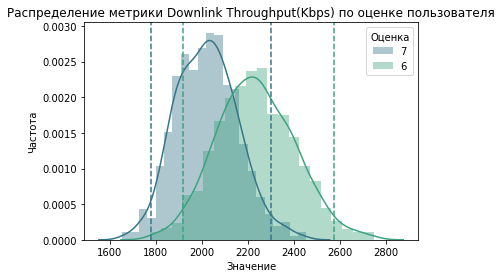

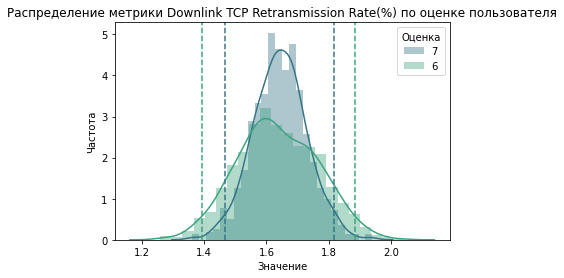

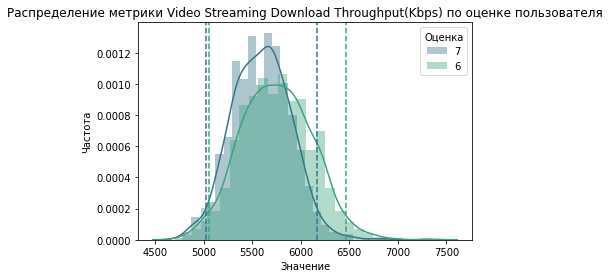

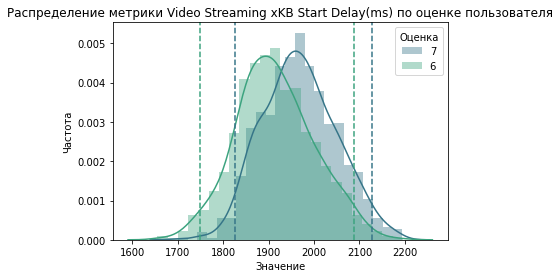

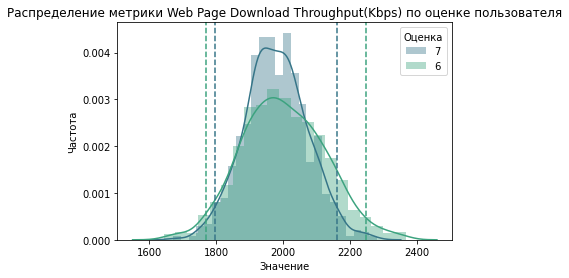

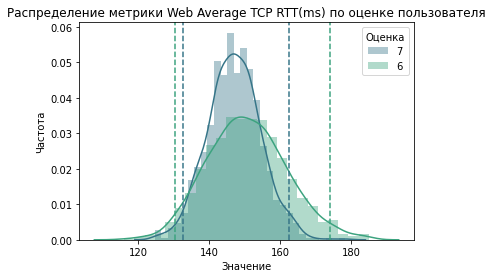

In [65]:
#Отдельно сравним группы с оценками 7 и 6:
for feature in n_cols[1:]:
    #Возьмем сэмплы
#     samples_a = bootstrap(q8[feature],N_TRIAL = 1000)
    samples_b = bootstrap(q7[feature],N_TRIAL = 1000)
    samples_c = bootstrap(q6[feature],N_TRIAL = 1000)
#     samples_d = bootstrap(q6[feature],N_TRIAL = 1000)
    
    
#     samples_a = np.array(samples_a)
    samples_b = np.array(samples_b)
    samples_c = np.array(samples_c)
#     samples_d = np.array(samples_d)
   
    #Нарисуем, что получилось:
#     ax = sns.distplot(samples_a,label = '8', color = '#FD7C6E')
    ax = sns.distplot(samples_b, label = '7', color = '#367588')
    sns.distplot(samples_c,ax = ax,label = '6', color = '#3ca37f')
#     sns.distplot(samples_c,ax = ax,label = '5', color = '#ba7ff5')
    
    #Для уровня значимости 5% и, следовательно, уровня доверия 95%, доверительный интервал будет такой:
#     ax.axvline(np.percentile(samples_a,2.5),linestyle = '--',color='#FD7C6E')
#     ax.axvline(np.percentile(samples_a,97.5),linestyle = '--',color='#FD7C6E')

    ax.axvline(np.percentile(samples_b,2.5),linestyle = '--',color='#367588')
    ax.axvline(np.percentile(samples_b,97.5),linestyle = '--',color='#367588')

    ax.axvline(np.percentile(samples_c,2.5),linestyle = '--',color='#3ca37f')
    ax.axvline(np.percentile(samples_c,97.5),linestyle = '--',color='#3ca37f')
    
#     ax.axvline(np.percentile(samples_c,2.5),linestyle = '--',color='#ba7ff5')
#     ax.axvline(np.percentile(samples_c,97.5),linestyle = '--',color='#ba7ff5')
        

    ax.legend(bbox_to_anchor = (1.0, 1), title = 'Оценка')
    
    plt.title('Распределение метрики {} по оценке пользователя'.format(feature))
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    
    plt.show()

**Результаты проверки гипотезы 3:**
В данном случае проблема кроется в другом - оценка 6 оказалась наименее популярной, т.е. её поставило ничтожно малое количество пользователей по сравнению с рядом других оценок. Скорее всего, аналогичная ситуация в части значений метрик будет наблюдаться в отношении оценок 4 и 2 - это второй и третий по непопулярности варианты ответа. 

На графиках выше это четко видно - распределение метрик для оценки 6 имеет более вытянутую форму с менее выраженным пиком. Также заметно, что доверительные интервалы для оценок с 8 по 6 достаточно сильно пересекаются между собой, т.е. начиная с оценки 9 и до 6 включительно, существенной разницы между показателями не наблюдается. 
При этом заметно, что для оценки 8 показатели скорости к абоненту и скорости загрузки видео чаще принимают большие значения, чем для оценки 7, т.е. доверительные интервалы для более высокой оценки больше смещены в правую сторону. Для остальных показателей каких-либо заметных смещений не наблюдается. 

По сравнению же с оценкой 9 также заметно небольшое смещение для оценки 6 в части показателей частоты переотправки пакетов (для группы с оценкой 6 чуть смещен в большую сторону) и скорости загрузки веб-страниц (для группы оценки 6 чаще ниже).

В итоге распределение графиков для оценок 6 и 7 больше визуально схоже друг с другом. Это может говорить о том, что это одна группа показателей (аналог оценки "удовлетворительно" по пятибалльной шкале).

Таким образом, можно еще раз отметить, что пользователи испытывают некоторые сложности в оценке по такой обширной шкале. В результате мы наблюдаем ситуацию, когда существенных разниц между значениями показателей для пользователей с оценками 6-9 не заметно.

**Попробуем по аналогии найти верхнюю границу недовольства - переход от "неудовлетворительно" к "удовлетвоительно". Для этого сравним все группы оценок группой, оценившей услуги компании на единицу.**

In [66]:
# Найдем p-value и интерпретируем получившееся.

for metric in n_cols[1:]: #для всех метрик, кроме использования трафика
    print(metric)
    p_vals = [] #пустой список для записи p-value
    interprets = [] #пустой список для записи их интерпретации
    for q in ques: #для всех данных, сгруппированных по ответу на вопрос 1
        p = p_calc(metric, q1, q, N_TRIAL = 1000, alpha = 0.05)[0] #сравниваем все группы с "отличниками" 
        p = round(p, 3) #округлим
        p_vals.append(p)
        
        if p > 0.05:
        #Распределения отличаются?
            a_text = 'нет'
        else:
            a_text = 'да'
        interprets.append(a_text)
              
    print('Значения p-value:')    
    print(p_vals)
    print('Распределения различны?')
    print(interprets)
    print('------------') #для читаемости

Downlink Throughput(Kbps)
Значения p-value:
[0.974, 0.016, 0.109, 0.224, 0.654, 0.0, 0.038, 0.001, 0.011, 0.0]
Распределения различны?
['нет', 'да', 'нет', 'нет', 'нет', 'да', 'да', 'да', 'да', 'да']
------------
Downlink TCP Retransmission Rate(%)
Значения p-value:
[0.975, 0.172, 0.453, 0.365, 0.777, 0.078, 0.094, 0.051, 0.0, 0.015]
Распределения различны?
['нет', 'нет', 'нет', 'нет', 'нет', 'нет', 'нет', 'нет', 'да', 'да']
------------
Video Streaming Download Throughput(Kbps)
Значения p-value:
[0.996, 0.018, 0.148, 0.399, 0.351, 0.0, 0.001, 0.0, 0.0, 0.0]
Распределения различны?
['нет', 'да', 'нет', 'нет', 'нет', 'да', 'да', 'да', 'да', 'да']
------------
Video Streaming xKB Start Delay(ms)
Значения p-value:
[0.997, 0.333, 0.448, 0.406, 0.601, 0.002, 0.032, 0.008, 0.0, 0.0]
Распределения различны?
['нет', 'нет', 'нет', 'нет', 'нет', 'да', 'да', 'да', 'да', 'да']
------------
Web Page Download Throughput(Kbps)
Значения p-value:
[0.991, 0.008, 0.494, 0.269, 0.709, 0.0, 0.002, 0.001, 0

In [67]:
#Сохраним всё вышеперечисленное в датафрейм (для визуализации):
metrics = [] #пустой список для записи метрик
p_vals = [] #пустой список для записи p-value
qs = []

for metric in n_cols[1:]: #для всех метрик, кроме использования трафика
    metrics += [metric]*len(ques) #забъем столбец метрикой
    for i, q in enumerate(ques): #для всех данных, сгруппированных по ответу на первый вопрос
        qs.append(i+1)# добавим в список числовую оценку
        p = p_calc(metric, q1, q, N_TRIAL = 1000, alpha = 0.05)[0] #сравниваем все группы с "отличниками" 
        p = round(p, 3) #округлим до третьего знакапосле запятой
        p_vals.append(p)

#Датафрейм:        
zips = list(zip(metrics, qs, p_vals)) #объединим получившиеся списки
comparison1 = pd.DataFrame(zips, columns=['Метрика', 'Оценка', 'p-value']) #создадим df
#Немного изменим его форму. Пускай метрики будут в виде столбцов:
comparison1 = comparison1.pivot(index = 'Оценка', columns = 'Метрика', values = 'p-value')
#Уберем лишнее название и создадим новый индекс:
comparison1.columns.name = None
comparison1.reset_index(inplace=True)
comparison1 #посмотрим на результат

Оценка  Downlink TCP Retransmission Rate(%)  Downlink Throughput(Kbps)   
0       1                                0.982                      0.977  \
1       2                                0.167                      0.019   
2       3                                0.475                      0.134   
3       4                                0.377                      0.248   
4       5                                0.789                      0.640   
5       6                                0.100                      0.000   
6       7                                0.109                      0.041   
7       8                                0.061                      0.001   
8       9                                0.001                      0.014   
9      10                                0.016                      0.000   

   Video Streaming Download Throughput(Kbps)   
0                                      0.977  \
1                                      0.022   
2                                      0.117   
3                                      0.443   
4                                      0.379   
5                                      0.000   
6                                      0.000   
7                                      0.000   
8                                      0.000   
9                                      0.000   

   Video Streaming xKB Start Delay(ms)  Web Average TCP RTT(ms)   
0                                0.965                    0.997  \
1                                0.331                    0.604   
2                                0.474                    0.324   
3                                0.421                    0.002   
4                                0.582                    0.188   
5                                0.002                    0.000   
6                                0.036                    0.000   
7                                0.006                    0.000   
8                                0.000                    0.000   
9                                0.000                    0.000   

   Web Page Download Throughput(Kbps)  
0                               0.989  
1                               0.007  
2                               0.454  
3                               0.276  
4                               0.653  
5                               0.001  
6                               0.001  
7                               0.000  
8                               0.000  
9                               0.000

In [68]:
#График для всех оценок:

metrics = n_cols[1:]

paper = go.Figure()

for m in metrics: #отрисуем сразу все графики, но скроем их
    paper.add_trace(
        go.Bar(x = comparison1['Оценка'], 
               y = comparison1[m], 
               marker=dict(color = comparison['Оценка'], colorscale='viridis'),
               visible=False,
               name = m
        )
    )

steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data)):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]} # настроим "показ" графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True

shapes = [
{'type': 'line','x0': 1,'y0': 0.05,
'x1': 10,'y1' : 0.05,'line': {'color': 'green','width': 2, 'dash':'dash'}}]
            

            
paper.update_layout(
    title={'text': 'Значения p-value для показателя {} для всех оценок по сравнению с 1'.format(paper.data[start_index].name)},
#     yaxis_range=[0, 1],
    xaxis_range=[1.5, 10.5], 
    yaxis_dtick=0.1,
    xaxis_dtick=1,
    yaxis_title = 'p-value',
    xaxis_title = 'оценка',
    shapes = shapes,
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

In [69]:
#График для оценок 2-5:

metrics = n_cols[1:]

paper = go.Figure()

for m in metrics: #отрисуем сразу все графики, но скроем их
    paper.add_trace(
        go.Bar(x = comparison1[1:5]['Оценка'], 
               y = comparison1[1:5][m], 
               marker=dict(color = comparison1[1:5]['Оценка'], colorscale='viridis'),
               visible=False,
               name = m
        ))
    
steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data)):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]} # настроим "показ" графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True

# paper.add_hline(y=0.05, line_width=3, line_dash="dash", line_color="green", annotation_text="граница p_value")
shapes = [
{'type': 'line','x0': 0,'y0': 0.05,
'x1': 6,'y1' : 0.05, "name":"граница p_value",'line': {'color': 'green','width': 2, 'dash':'dash'}}]

paper.update_layout(
    title={'text': 'Значения p-value для показателя {} для ряда оценок по сравнению с 1'.format(paper.data[start_index].name)},
    xaxis_range=[1.5, 5.5], 
#     yaxis_range=[0, 1], 
    yaxis_dtick=0.1,
    xaxis_dtick=1,
    yaxis_title = 'p-value',
    xaxis_title = 'оценка',
    shapes = shapes,
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

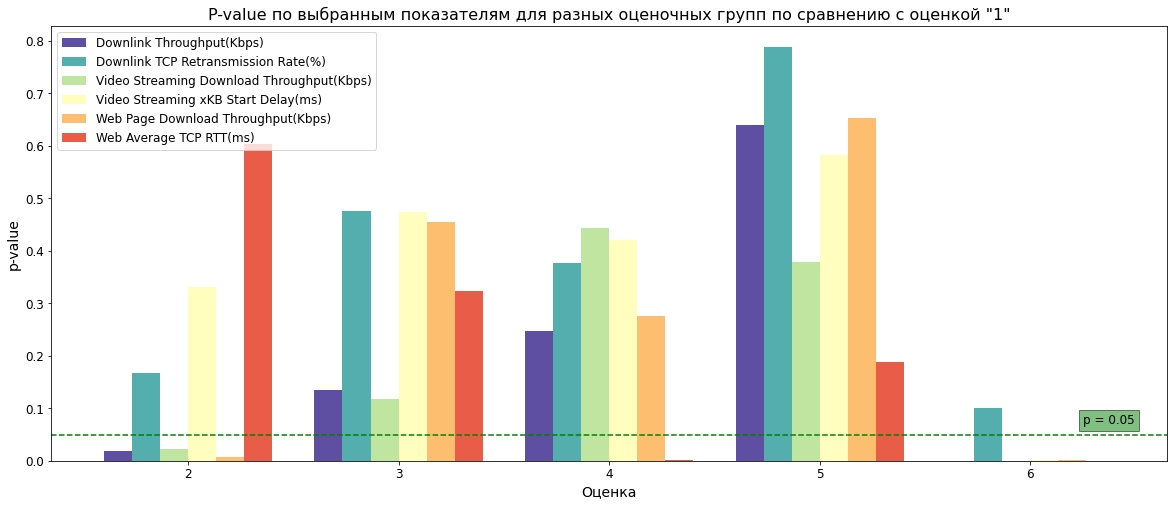

In [98]:
#Общий график для презентации
import matplotlib.pylab as pl

df_c = comparison1[1:6]
y_range = np.arange(0,max(df_c['Downlink TCP Retransmission Rate(%)']+0.1), 0.1)
y_range = np.round(y_range, 2)

colors = pl.cm.Spectral_r(np.linspace(0,1,7))
ax = df_c.plot(x="Оценка", y=n_cols[1:], kind="bar", figsize = (20,8), color = colors, width=0.8)
plt.legend(loc="upper left", fontsize = 12)
# title = 'Показатель', title_fontsize = 12


plt.axhline(y=0.05, color='g', linestyle='--', label = 'p = 0.05')
plt.text(4.25, 0.07, 'p = 0.05', fontsize = 12, 
         bbox = dict(facecolor = 'g', alpha = 0.5))
  
ax.set_xticklabels([2,3,4,5,6], rotation='horizontal', size = 12)
ax.set_yticks(y_range)
ax.set_yticklabels(y_range, rotation='horizontal', size = 12)

plt.title('P-value по выбранным показателям для разных оценочных групп по сравнению с оценкой "1"', size = 16)
plt.xlabel("Оценка", size = 14)
plt.ylabel("p-value", size = 14)
plt.show()

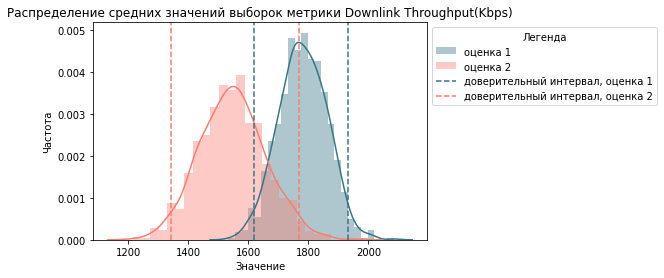

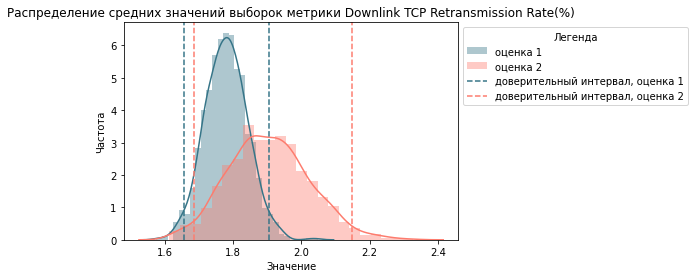

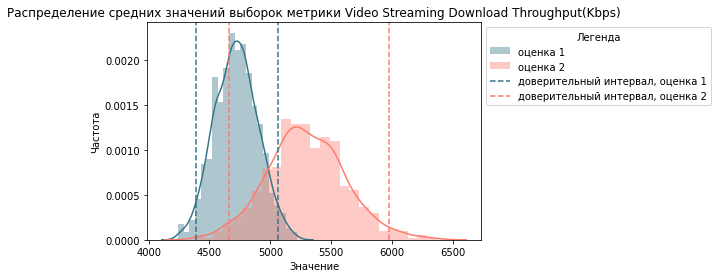

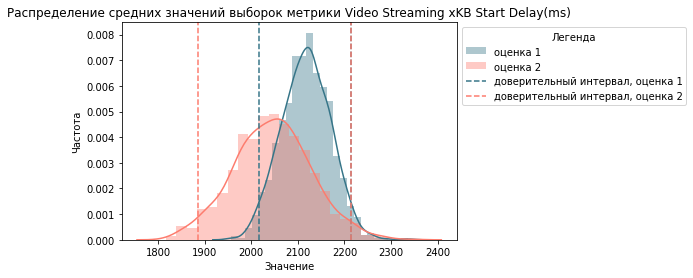

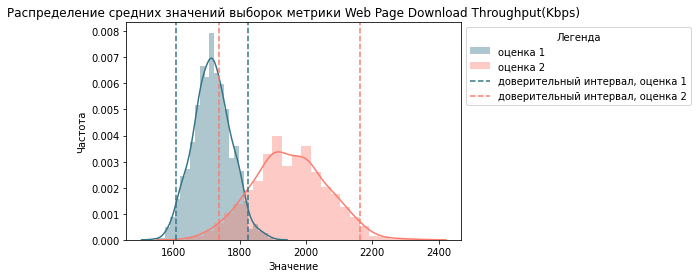

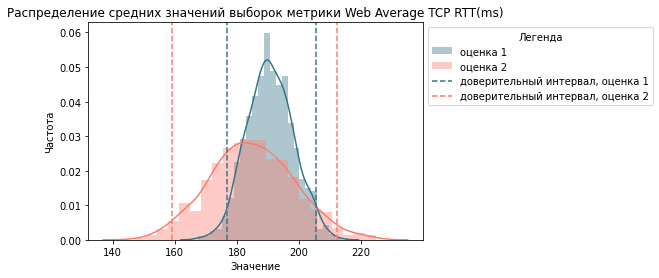

In [70]:
# Детальнее посмотрим на отличие между группами с оценками 1 и 2: 
for col in n_cols[1:]:
    draw_boot_hist(q1, q2, col, 'оценка 1', 'оценка 2')

**Гипотеза 4:**  
Как мы и опасались, разница в количестве оценок 1 и 2 привела к не совсем ожидаемому результату. Получилось, что значения метрик скорости к абоненту, скоростей загрузки видео и веб-страниц, для второй группы зачастую оказывались больше не то, что аналогичных показателей у первой группы, но и у групп с оценками 3 и выше. Понятно, что это противоречит самой логике оценки. 
Поэтому есть смысл дополнительно проверить, насколько сильно отличаются значения показателей у группы со следующей по величине оценкой - тройкой от значений метрик группы максимально неудовлетворенных.

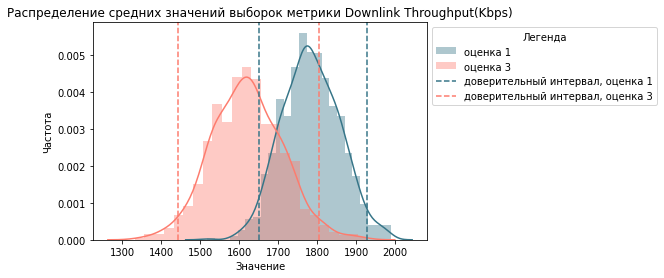

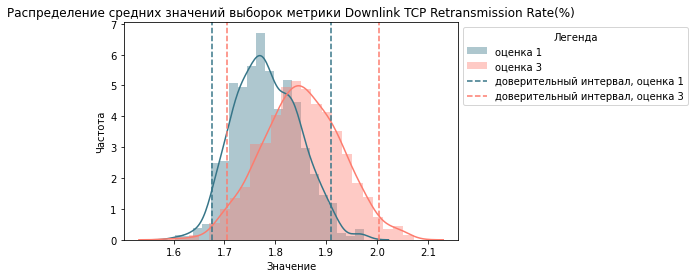

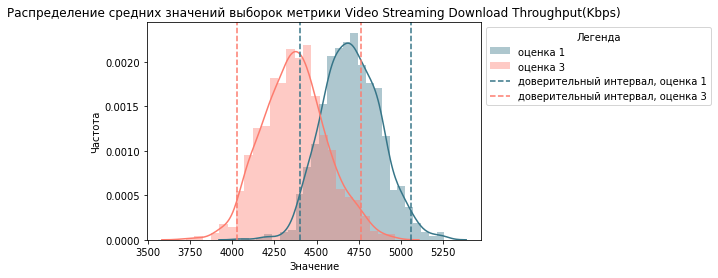

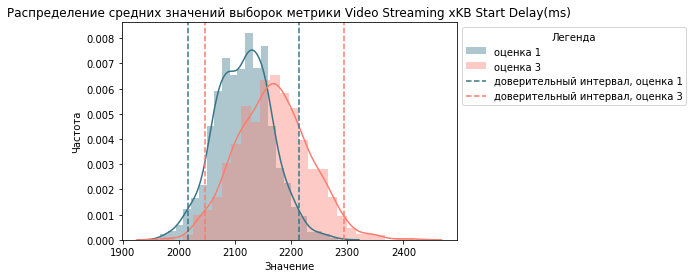

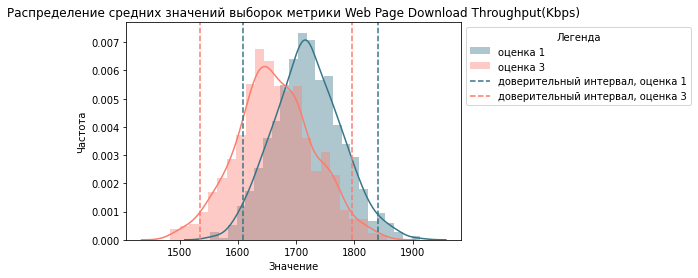

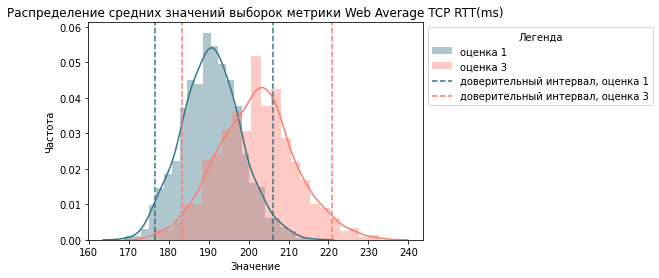

In [71]:
# Сравним доверительные интервалы для средних значений оценок 1 и 3: 
for col in n_cols[1:]:
    draw_boot_hist(q1, q3, col, 'оценка 1', 'оценка 3')

**Результаты проверки гипотезы 4:**

Заметно, что группа с оценкой 3 оказалась больше похожей на группу с оценкой 1, чем оценка 2.  Таким образом можно сделать вывод, что более высокие показатели метрик для оценки 2 являются результатом именно меньшей популярности этой оценки по сравнению с теми же оценками 1 и 3. Более того, графики выше показали, что по многим метрикам группа с оценкой 3 имеет даже чуть более плохие результаты по сравнению с группой оценки 1 (недостаточные, однако, для того, чтобы считать такие различия существенными). 

Скорее всего это связано с тем, что недовольные пользователи с большей охотой ставили услугам 'кол', даже не пытаясь подойти к этой оценке более объективно. Тем самым для группы недовольных эта оценка значительно превалирует над другими. В этом плане наиболее репрезентативной оценкой может являться тройка.

**Поэтому дополнительно сравним показатели по оценке 3 со всеми остальными:**

In [72]:
# Найдем p-value и интерпретируем получившееся.

for metric in n_cols[1:]: #для всех метрик, кроме использования трафика
    print(metric)
    p_vals = [] #пустой список для записи p-value
    interprets = [] #пустой список для записи их интерпретации
    for q in ques: #для всех данных, сгруппированных по ответу на вопрос 3
        p = p_calc(metric, q3, q, N_TRIAL = 1000, alpha = 0.05)[0] #сравниваем все группы с "отличниками" 
        p = round(p, 3) #округлим
        p_vals.append(p)
        
        if p > 0.05:
        #Распределения отличаются?
            a_text = 'нет'
        else:
            a_text = 'да'
        interprets.append(a_text)
              
    print('Значения p-value:')    
    print(p_vals)
    print('Распределения различны?')
    print(interprets)
    print('------------') #для читаемости

Downlink Throughput(Kbps)
Значения p-value:
[0.22, 0.569, 0.994, 0.036, 0.093, 0.0, 0.003, 0.0, 0.001, 0.0]
Распределения различны?
['нет', 'нет', 'нет', 'да', 'нет', 'да', 'да', 'да', 'да', 'да']
------------
Downlink TCP Retransmission Rate(%)
Значения p-value:
[0.535, 0.616, 0.991, 0.209, 0.392, 0.051, 0.053, 0.034, 0.0, 0.009]
Распределения различны?
['нет', 'нет', 'нет', 'нет', 'нет', 'нет', 'нет', 'да', 'да', 'да']
------------
Video Streaming Download Throughput(Kbps)
Значения p-value:
[0.24, 0.003, 0.965, 0.078, 0.059, 0.0, 0.0, 0.0, 0.0, 0.0]
Распределения различны?
['нет', 'да', 'нет', 'нет', 'нет', 'да', 'да', 'да', 'да', 'да']
------------
Video Streaming xKB Start Delay(ms)
Значения p-value:
[0.551, 0.184, 0.972, 0.229, 0.357, 0.002, 0.022, 0.005, 0.0, 0.0]
Распределения различны?
['нет', 'нет', 'нет', 'нет', 'нет', 'да', 'да', 'да', 'да', 'да']
------------
Web Page Download Throughput(Kbps)
Значения p-value:
[0.574, 0.006, 0.983, 0.158, 0.313, 0.001, 0.002, 0.001, 0.0, 0

In [73]:
#Составим датафрейм (для визуализации):
metrics = [] #пустой список для записи метрик
p_vals = [] #пустой список для записи p-value
qs = []

for metric in n_cols[1:]: #для всех метрик, кроме использования трафика
    metrics += [metric]*len(ques) #забъем столбец метрикой
    for i, q in enumerate(ques): #для всех данных, сгруппированных по ответу на первый вопрос
        qs.append(i+1)# добавим в список числовую оценку
        p = p_calc(metric, q3, q, N_TRIAL = 1000, alpha = 0.05)[0] #сравниваем все группы с "отличниками" 
        p = round(p, 3) #округлим до третьего знакапосле запятой
        p_vals.append(p)

#Датафрейм:        
zips = list(zip(metrics, qs, p_vals)) #объединим получившиеся списки
comparison2 = pd.DataFrame(zips, columns=['Метрика', 'Оценка', 'p-value']) #создадим df
#Немного изменим его форму. Пускай метрики будут в виде столбцов:
comparison2 = comparison2.pivot(index = 'Оценка', columns = 'Метрика', values = 'p-value')
#Уберем лишнее название и создадим новый индекс:
comparison2.columns.name = None
comparison2.reset_index(inplace=True)
comparison2 #посмотрим на результат

Оценка  Downlink TCP Retransmission Rate(%)  Downlink Throughput(Kbps)   
0       1                                0.540                      0.239  \
1       2                                0.625                      0.548   
2       3                                0.979                      0.998   
3       4                                0.176                      0.041   
4       5                                0.423                      0.100   
5       6                                0.051                      0.000   
6       7                                0.053                      0.004   
7       8                                0.033                      0.000   
8       9                                0.001                      0.001   
9      10                                0.010                      0.000   

   Video Streaming Download Throughput(Kbps)   
0                                      0.224  \
1                                      0.002   
2                                      0.984   
3                                      0.094   
4                                      0.057   
5                                      0.000   
6                                      0.000   
7                                      0.000   
8                                      0.000   
9                                      0.000   

   Video Streaming xKB Start Delay(ms)  Web Average TCP RTT(ms)   
0                                0.541                    0.419  \
1                                0.183                    0.215   
2                                0.981                    0.988   
3                                0.246                    0.001   
4                                0.330                    0.054   
5                                0.001                    0.000   
6                                0.026                    0.000   
7                                0.004                    0.000   
8                                0.000                    0.000   
9                                0.000                    0.000   

   Web Page Download Throughput(Kbps)  
0                               0.624  
1                               0.007  
2                               0.981  
3                               0.145  
4                               0.349  
5                               0.000  
6                               0.001  
7                               0.000  
8                               0.000  
9                               0.000

In [74]:
#График для всех оценок:

metrics = n_cols[1:]

paper = go.Figure()

for m in metrics: #отрисуем сразу все графики, но скроем их
    paper.add_trace(
        go.Bar(x = comparison2['Оценка'], 
               y = comparison2[m], 
               marker=dict(color = comparison2['Оценка'], colorscale='viridis'),
               visible=False,
               name = m
        )
    )

steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data)):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]} # настроим "показ" графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True

shapes = [
{'type': 'line','x0': 0,'y0': 0.05,
'x1': 11,'y1' : 0.05,'line': {'color': 'green','width': 2, 'dash':'dash'}}]
            

            
paper.update_layout(
    title={'text': 'Значения p-value для показателя {} для всех оценок по сравнению с 3'.format(paper.data[start_index].name)},
#     yaxis_range=[0, 1],
    xaxis_range=[0.5, 10.5], 
    yaxis_dtick=0.1,
    xaxis_dtick=1,
    yaxis_title = 'p-value',
    xaxis_title = 'оценка',
    shapes = shapes,
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

По графику заметно, что в таком случае последней низкой оценкой будет 5. Сократим график для лучшей читаемости.

In [75]:
#График для оценок 1-5:

metrics = n_cols[1:]

paper = go.Figure()

for m in metrics: #отрисуем сразу все графики, но скроем их
    paper.add_trace(
        go.Bar(x = comparison2[:5]['Оценка'], 
               y = comparison2[:5][m], 
               marker=dict(color = comparison2[:5]['Оценка'], colorscale='viridis'),
               visible=False,
               name = m
        ))
    
steps = [] #чтобы вручную не определять параметры отображения для каждой метрики напишем цикл:
for i in range(len(paper.data)):
    step = dict(
        method="update",
        args = [
            {'visible': [t == i for t in range(len(paper.data))]} # настроим "показ" графика
        ],
        label = paper.data[i].name #подпись на самой "кнопке" для переключения значений
    )
    steps.append(step)

start_index = 0
paper.data[start_index].visible = True

# paper.add_hline(y=0.05, line_width=3, line_dash="dash", line_color="green", annotation_text="граница p_value")
shapes = [
{'type': 'line','x0': 0,'y0': 0.05,
'x1': 6,'y1' : 0.05, "name":"граница p_value",'line': {'color': 'green','width': 2, 'dash':'dash'}}]

paper.update_layout(
    title={'text': 'Значения p-value для показателя {} для ряда оценок по сравнению с 3'.format(paper.data[start_index].name)},
    xaxis_range=[0.5, 5.5], 
#     yaxis_range=[0, 1], 
    yaxis_dtick=0.1,
    xaxis_dtick=1,
    yaxis_title = 'p-value',
    xaxis_title = 'оценка',
    shapes = shapes,
    updatemenus=[
        dict(
            buttons= steps,
            y=1,
            xanchor="right"
        )
           
    ] 
)
   
paper.show()

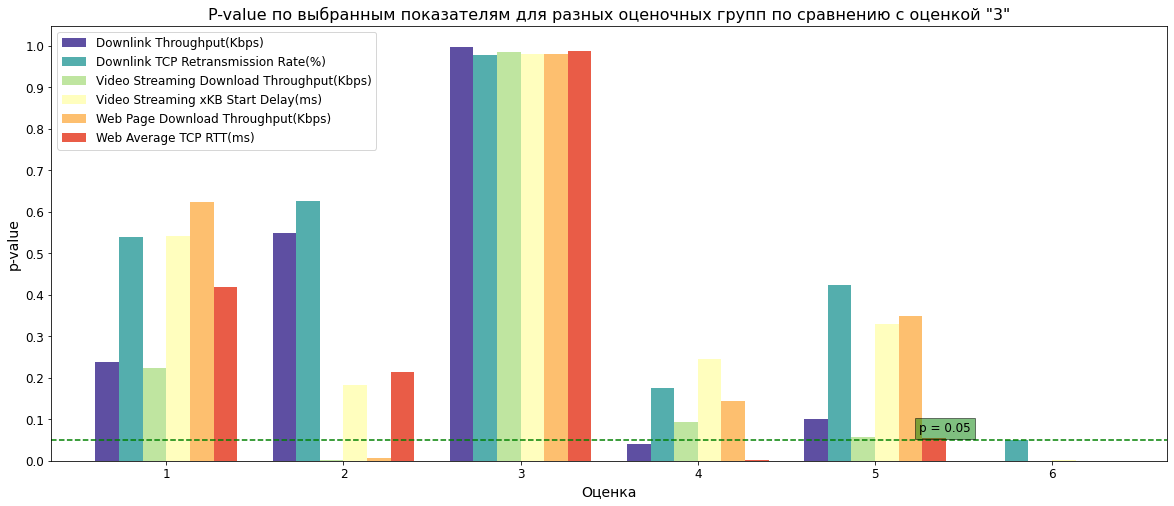

In [101]:
#Общий график для сравнения с 3
import matplotlib.pylab as pl

df_c = comparison2[:6]
y_range = np.arange(0,max(df_c['Downlink TCP Retransmission Rate(%)']+0.1), 0.1)
y_range = np.round(y_range, 2)

colors = pl.cm.Spectral_r(np.linspace(0,1,7))
ax = df_c.plot(x="Оценка", y=n_cols[1:], kind="bar", figsize = (20,8), color = colors, width=0.8)
plt.legend(loc="upper left", fontsize = 12)
# title = 'Показатель', title_fontsize = 12


plt.axhline(y=0.05, color='g', linestyle='--', label = 'p = 0.05')
plt.text(4.25, 0.07, 'p = 0.05', fontsize = 12, 
         bbox = dict(facecolor = 'g', alpha = 0.5))
  
ax.set_xticklabels([1,2,3,4,5,6], rotation='horizontal', size = 12)
ax.set_yticks(y_range)
ax.set_yticklabels(y_range, rotation='horizontal', size = 12)

plt.title('P-value по выбранным показателям для разных оценочных групп по сравнению с оценкой "3"', size = 16)
plt.xlabel("Оценка", size = 14)
plt.ylabel("p-value", size = 14)
plt.show()

**Выявим верхнюю границу низкой оценки.**

**Для начала посмотрим, насколько сильно отличается следующая оценка 4 по сравнению со значениями для оценок 1 и 3.**

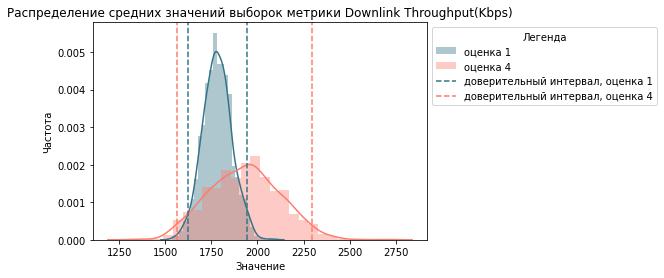

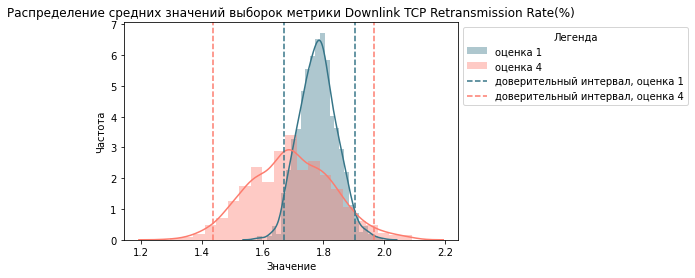

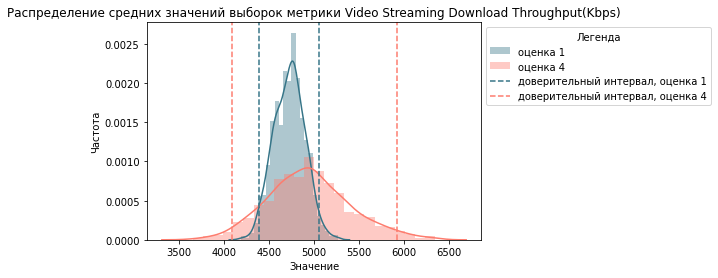

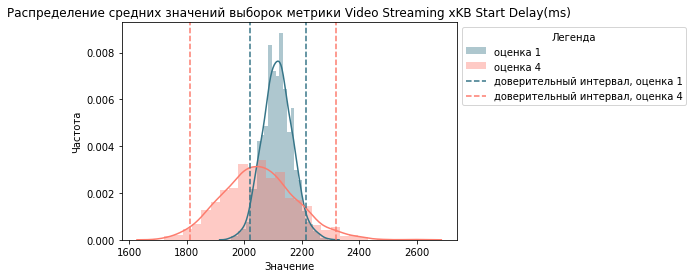

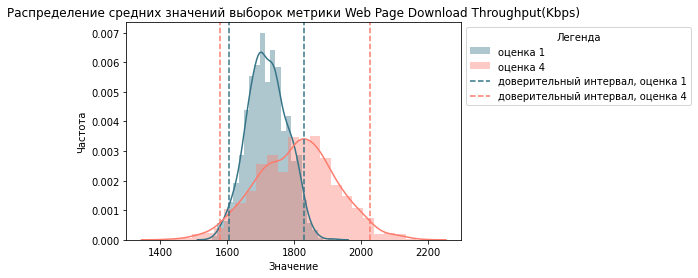

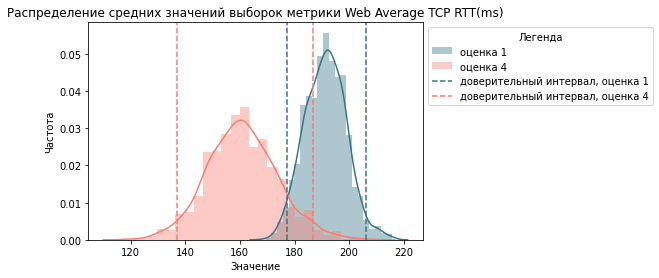

In [76]:
# Оценки 1 и 4:
for col in n_cols[1:]:
    draw_boot_hist(q1, q4, col, 'оценка 1', 'оценка 4')

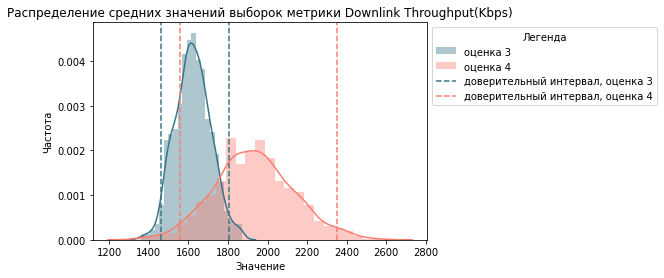

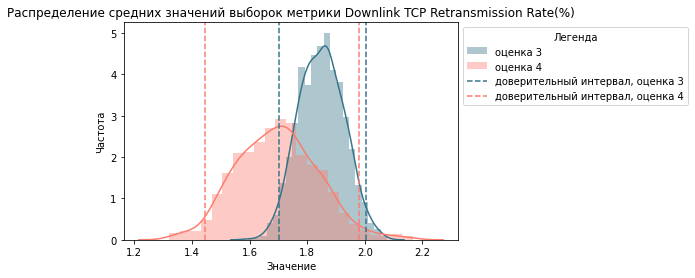

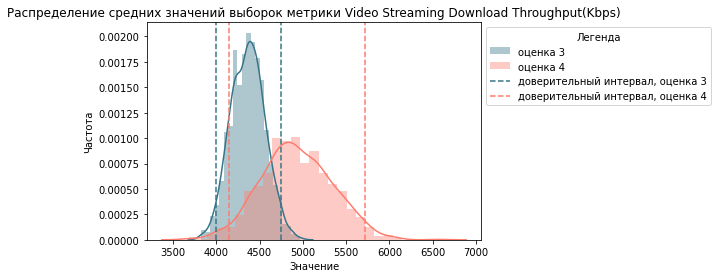

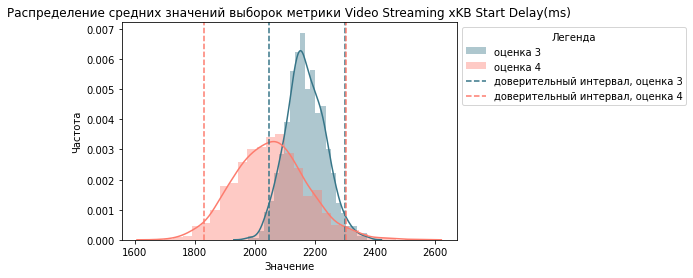

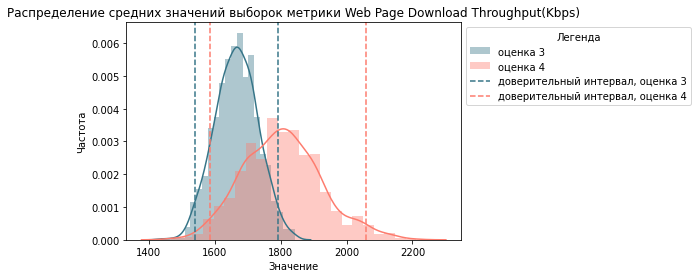

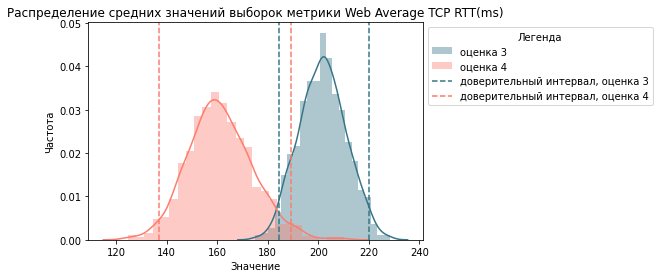

In [77]:
# Оценки 3 и 4:
for col in n_cols[1:]:
    draw_boot_hist(q3, q4, col, 'оценка 3', 'оценка 4')

Оценка 4 показала первое изменение в метриках по сравнению с оценкой 1 - для неё характерно более низкое значение пинга при просмотре web-страниц. 
По сравнению с самыми худшими значениями в оценке 3 также наблюдаются изменения. В группе с более высокой оценкой все показатели значительно лучше. 

**Гипотеза 5:**
Однако считать оценку 4 последней неудачной сложно по той причине, что группа с оценкой 5 очень похожа по значениям показателей на оценку 1. Возможно есть смысл сравнить её с оценкой 3 (наименьшими значениями)?

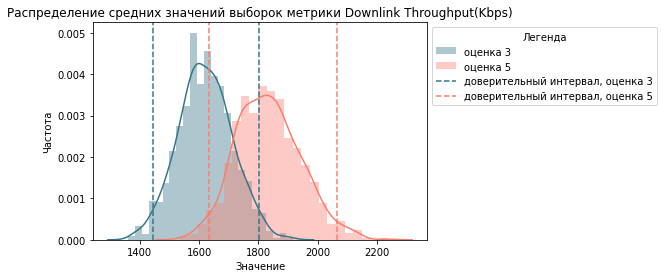

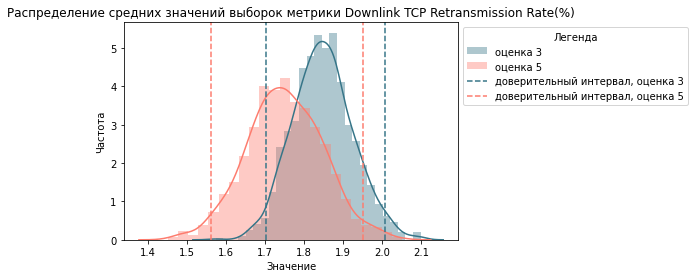

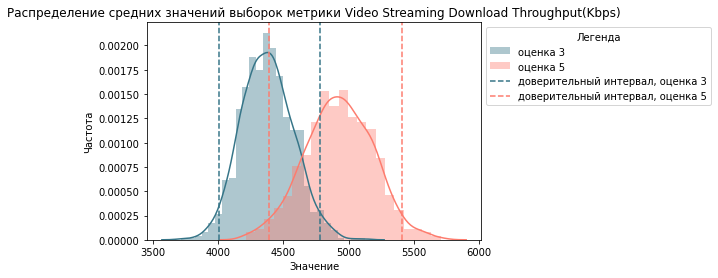

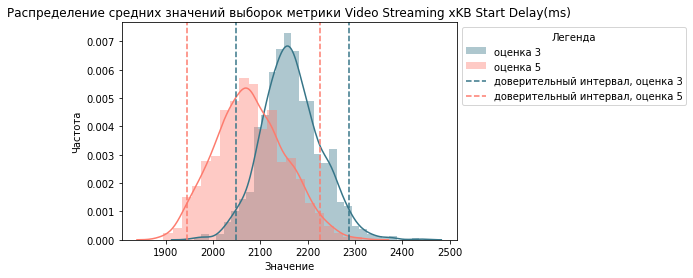

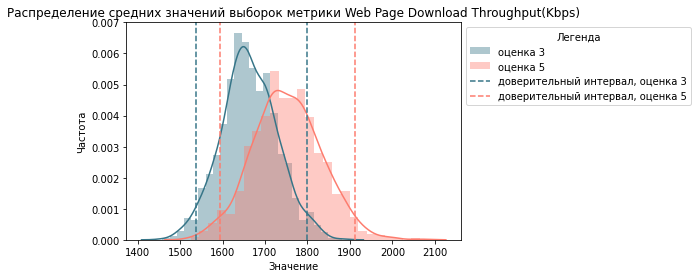

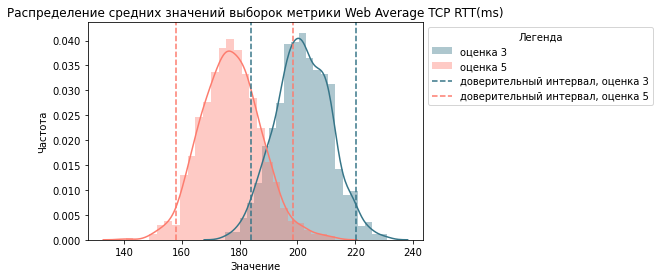

In [78]:
# Оценки 3 и 5:
for col in n_cols[1:]:
    draw_boot_hist(q3, q5, col, 'оценка 3', 'оценка 5')

**Результаты проверки гипотезы 5:**

Учитывая уже упомянутое маленькое количество данных по такой оценке в совокупности с тем фактом, что оценка 5 не имеет существенных различий с группой оценки 1, пограничной оценкой следует считать именно оценку 5. Начиная с оценки 6 и выше, значительно возрастают значения метрик скорости к абоненту, а также скорости загрузки видео и веб страниц и падают значения показателей задержки воспроизведения видео и пинга при просмотре веб-страниц. Можно визуализировать эти разницы.

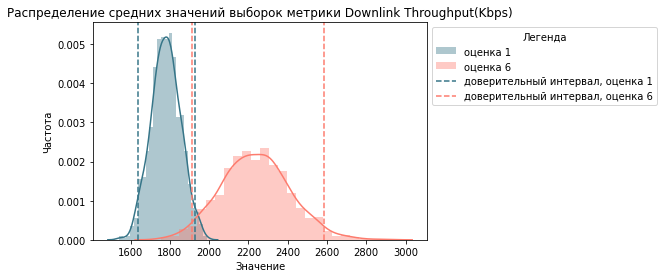

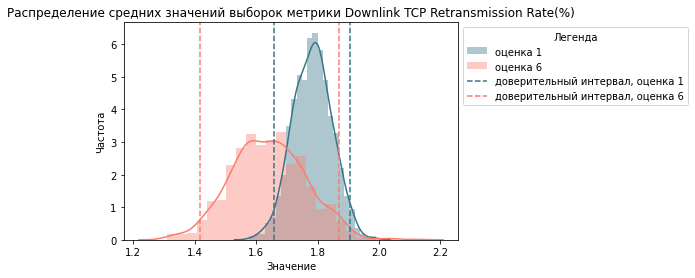

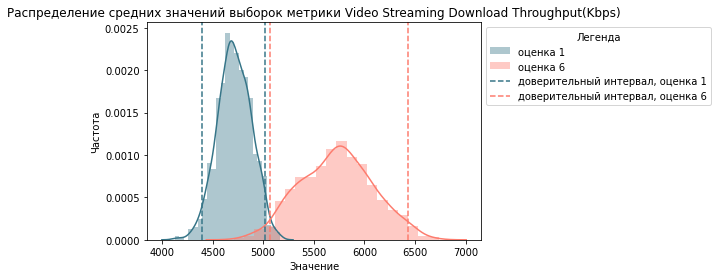

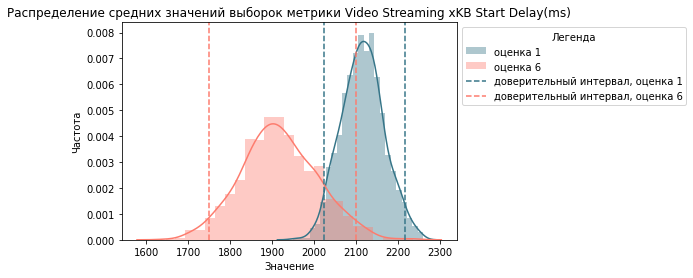

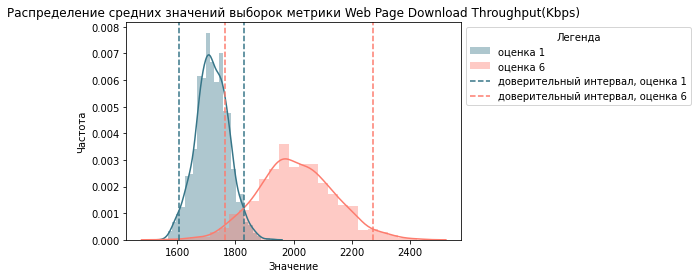

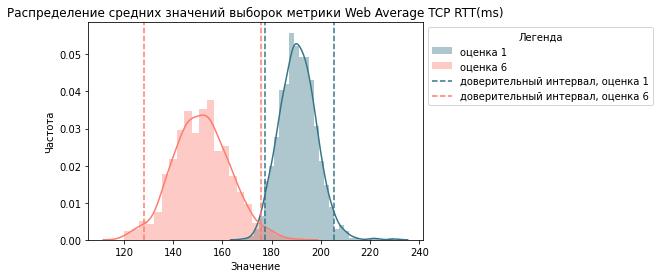

In [79]:
for col in n_cols[1:]:
    draw_boot_hist(q1, q6, col, 'оценка 1', 'оценка 6')

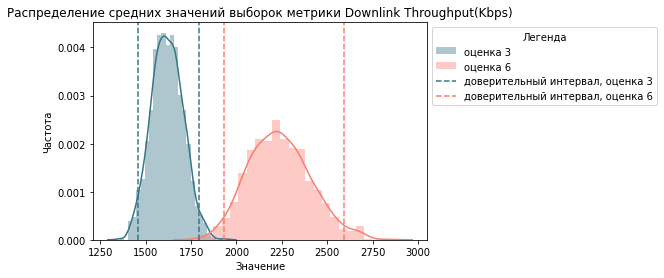

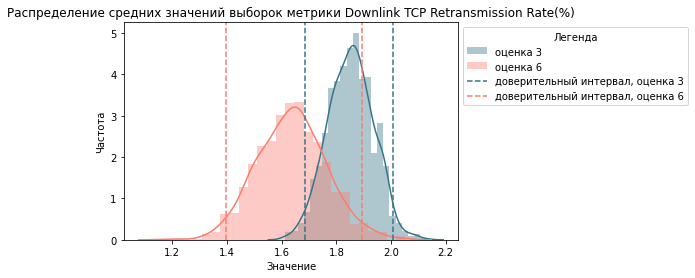

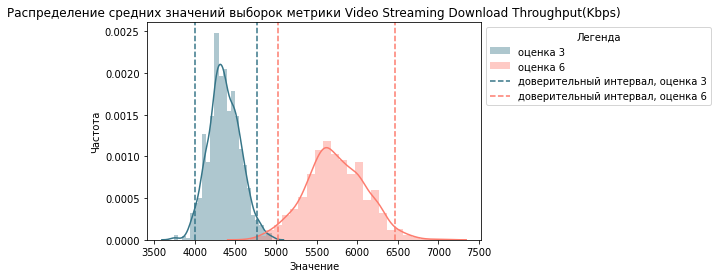

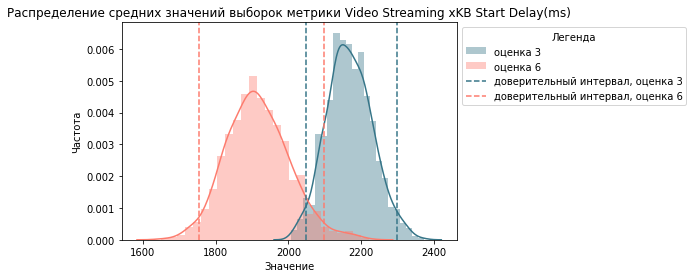

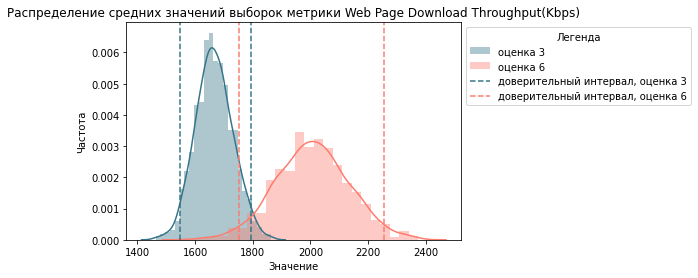

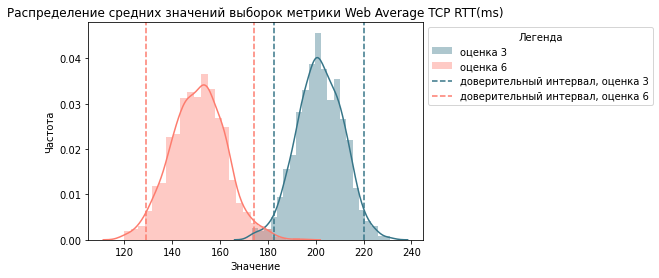

In [80]:
#Также для оценки 3:
for col in n_cols[1:]:
    draw_boot_hist(q3, q6, col, 'оценка 3', 'оценка 6')

Наши доводы подтвердились. Можно сделать общий вывод по данному разделу.

**Вывод по разделу:** мы проанализировали различия средних значений по ряду метрик в разрезе оценок качества услуг связи согласно ответам на первый вопрос. В итоге еще раз можно поднять тему о небходимости пересмотра десятибалльной шкалы оценки качества услуг. Так, например, известно, что между оценками с 8 по 10 нет существенных различий (хотя наблюдаются чуть лучшие значения показателей для максимальной оценки).  

Границы остальных оценок очень размыты - увеличение оценки не всегда сопровождалось улучшением показателей. Связано это с сильной количественной разницей самих оценок. 

Условно можно поделить их на следующие группы - 1-5 - неудовлетворительно, 6-7 - удовлетворительно, 8-9 - хорошо и 10 - отлично. При этом, разброс значений метрик в группах с оценкой 10 и оценкой 3 можно считать за некие эталоны самых удовлетворительных и самых неудовлетворительных значений по метрикам, что можно использовать при дальнейшем анализе и прогнозировании. В то же время самая низкая оценка имела достаточно широкий интревал значений, что может быть вызвано некоторой необъективностью её проставления пользователями. 

Особо следует омтетить, что переход от группы высоких к средним, а далее к низким оценкам всегда сопровождался прежде всего изменением показателя 'Downlink Throughput(Kbps)' - средней скорости к абоненту или пропускной способности канала связи. Во вторую очередь менялся показатель 'Video Streaming xKB Start Delay(ms)', а последним - Web Page Download Throughput(Kbps) — скорость загрузки web-страниц через браузер.  

Увеличение оценки от самой неудовлетворительной до удовлетворительной в то же время сопровождалось еще и уменьшением пинга при просмотре web-страниц. Таким образом, можно сделать вывод, что среди всех метрик именно эти является приоритетными для пользователя.

## 3.4 Анализ жалоб на услуги компании по ответам на второй вопрос

### 3.4.1 Оценка значений метрик пользователей с жалобами на плохое качество телефонной связи

Как мы помним из диаграмм процентного соотношения ответов на второй вопрос (по причинам недовольства услугами компании), самыми частыми жалобами оказались проблемы с телефонной связью, а именно: плохое качества связи в зданиях и ТЦ, а также недозвоны, обрывы при звонках.

*Примечание: первую жалобу считаю скорее "телефонной", поскольку жалобы на медленный интернет вынесены отдельным пунктом.*

Для анализа же нам пердоставлены характеристики Интернет-соединения, загрузки видео и веб-страниц, что делает анализ характеристик телефонной связи невозможным. Однако можно проверить есть ли у ползователей с плохой телефонной связью проблемы, в том числе, с пользованием интернетом. Наличие комплексных проблем в обеих этих сферах может свидетельствовать о том, что ряд абонентов компании проживает в регионе с плохим покрытием, что негативно сказывается на любом виде связи.

**Сформулируем гипотезы:**

*По научному:*
    
H0 - распределение метрики одинаково для указавших варианты ответов 1 или 3 и довольных услугами компании абонентов;

H1- распределение метрики статистически значимо отличается для указанных групп пользователей.

*По смыслу:*

H0 - у пользователей, жалующихся на телефонную связь, нет никаких проблем с интернет-соединением;

H1 - пользователи с плохой телефонной связью также имеют сопутствующие проблемы с скоростью интернет-соединения, просмотром видео и загрузкой веб-страниц.

Сохраним в отдельный датасет тех, кто негативно отзывался о качестве телефонной связи, т.е. тех кто отметил причины недовольства:
* Недозвоны, обрывы при звонках
* Плохое качество связи в зданиях

In [81]:
df_n = df.dropna(subset = ['Q2']) # уберем NAN
df_phone = df_n[(df_n['Q2'].str.contains('1')) | (df_n['Q2'].str.contains('3'))] #содержат ответ 1 или 3
df_phone.shape[0] #количество элементов

898

In [82]:
#И сравним получившийся датасет с группой довольных пользователей (оценка больше 8):
#Возьмем всё те же показатели за исключением Total Traffic 
for feature in n_cols[1:]:
    U_statest(feature, df_phone[feature], df_b[feature])
    KS_statest(feature, df_phone[feature], df_b[feature])

U-критерий по метрике Downlink Throughput(Kbps) :
Statistics=387952.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink Throughput(Kbps) :
Statistics=0.094, p=0.001
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Downlink TCP Retransmission Rate(%) :
Statistics=486821.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink TCP Retransmission Rate(%) :
Statistics=0.093, p=0.001
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Video Streaming Download Throughput(Kbps) :
Statistics=379399.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Video Streaming Download Throughput(Kbps) :
Statistics=0.113, p=0.000
Разное распределение метрик

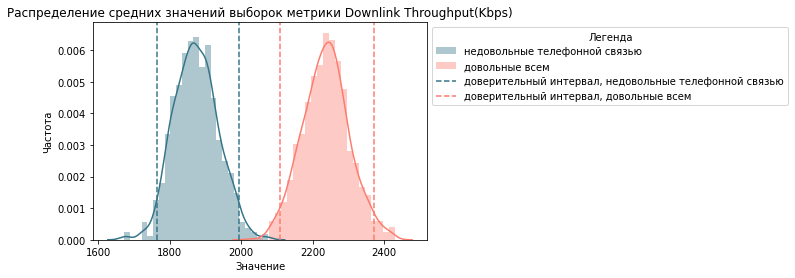

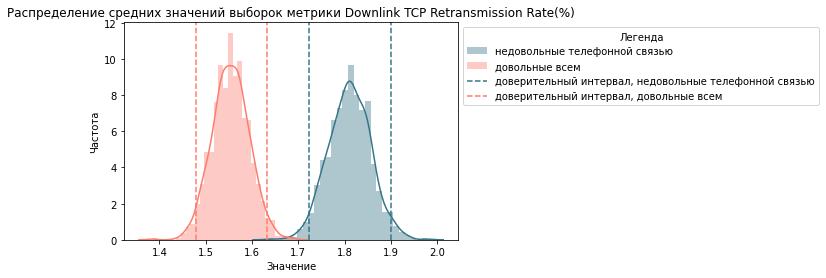

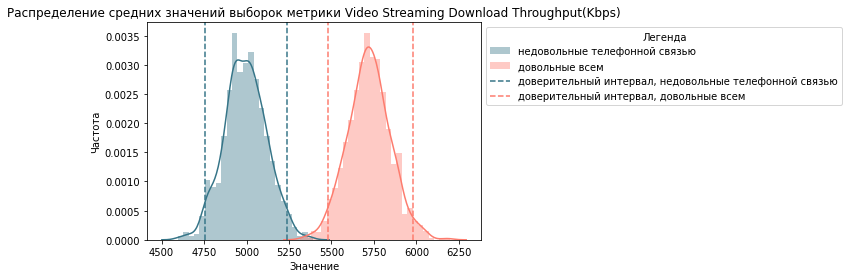

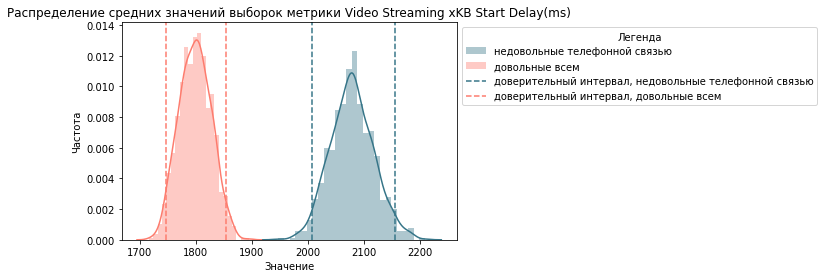

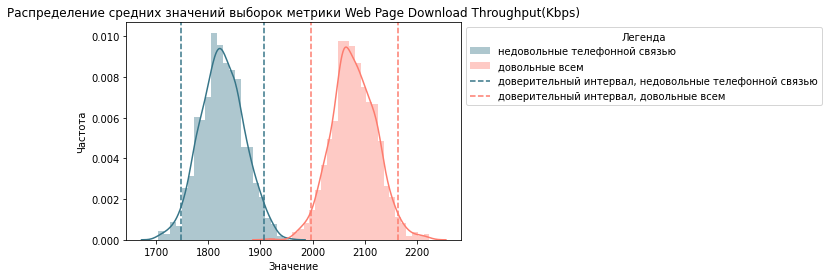

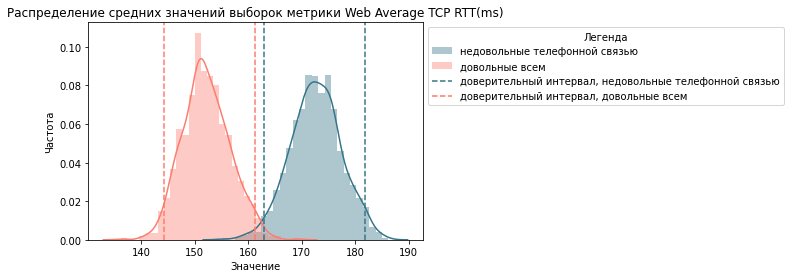

In [83]:
#Рисуем графики:
for col in n_cols[1:]:
    draw_boot_hist(df_phone, df_b, col, 'недовольные телефонной связью', 'довольные всем')

Как уже было упомянуто ранее, вариант ответа "плохое качества связи в зданиях и ТЦ" мог быть истрактован пользователем двояко, т.е. подразумевать как плохую телефонную связь, так и постоянно прерывающееся интернет-соединение. Поэтому есть смысл рассмотреть отдельно группу пользователей, отметивших в качестве причины недовольства "недозвоны, обрывы при звонках". В этом вопросе точно идеть речь именно про телефонную связь.

In [84]:
df_phone = df_n[df_n['Q2'].str.contains('1')]
df_phone.shape[0]

565

In [85]:
for feature in n_cols[1:]:
    U_statest(feature, df_phone[feature], df_b[feature])
    KS_statest(feature, df_phone[feature], df_b[feature])

U-критерий по метрике Downlink Throughput(Kbps) :
Statistics=246158.000, p=0.001
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink Throughput(Kbps) :
Statistics=0.090, p=0.005
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Downlink TCP Retransmission Rate(%) :
Statistics=304274.500, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink TCP Retransmission Rate(%) :
Statistics=0.102, p=0.001
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Video Streaming Download Throughput(Kbps) :
Statistics=242957.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Video Streaming Download Throughput(Kbps) :
Statistics=0.104, p=0.001
Разное распределение метрик

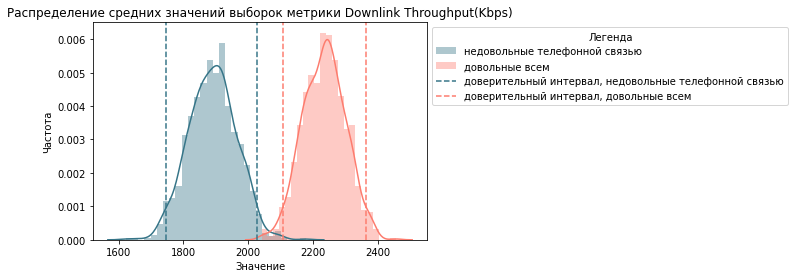

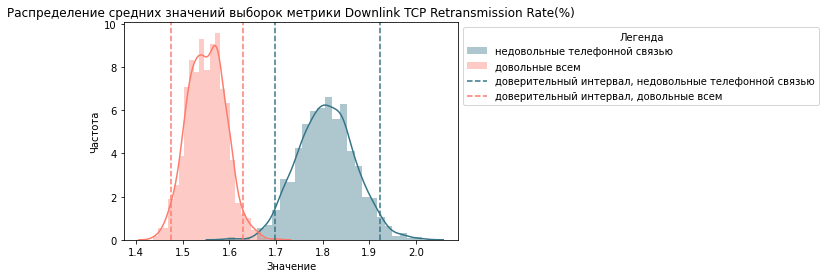

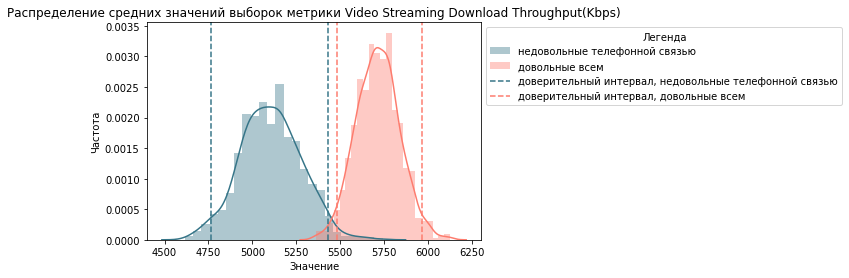

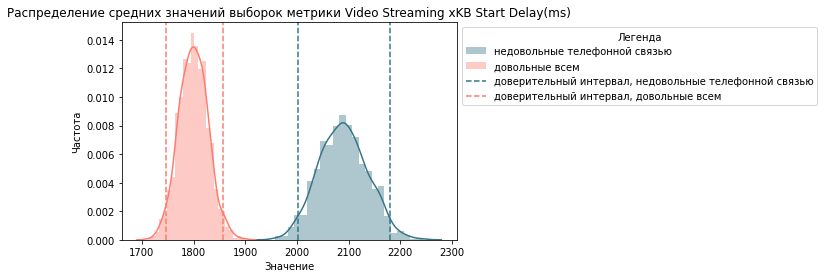

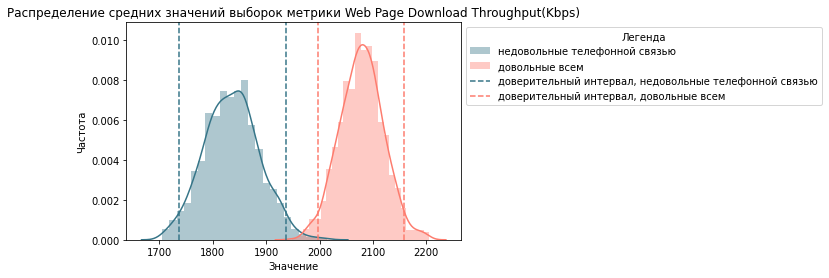

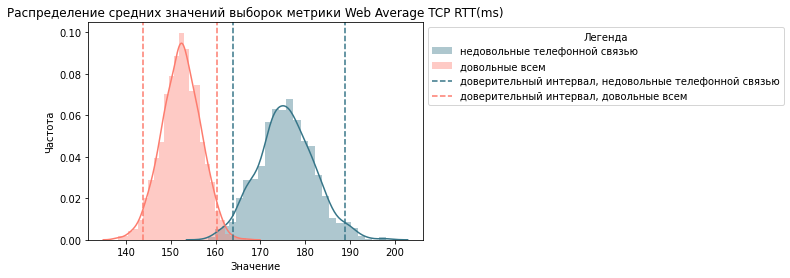

In [86]:
for col in n_cols[1:]:
    draw_boot_hist(df_phone, df_b, col, 'недовольные телефонной связью', 'довольные всем')

**Промежуточный вывод:** Выбор только одного из вариантов ответа никак не повлиял на общую картину. Похоже, что среди абонентов компании есть достаточно большое количество людей, у которых проблемы со связью несут комплексный характер. С большой долью вероятности такие пользователи живут или работают в местах, где со связью компании Мегафон есть проблемы. Для компании эта информация тоже ценна, поскольку подсказывает в каких регионах требуется её дополнительная работа в целях устранения текущих неисправностей.

### 3.4.2 Распределение значений показателей у пользователей с медленным интернетом

**Также интересно будет сравнить метрики в разрезе следующих групп:**

а) указавших в качестве причины недовольства медленный мобильный интернет;

б) остальных "недовольных" пользователей.

**Сформулируем гипотезы:**

*По научному:*
    
H0 - распределение метрики одинаково для указавших в качестве причины своего недовольства медленный мобильный интернет и у остальных недовольных услугами компании пользователей;

H1- распределение метрики статистически значимо отличается для указанных групп пользователей.

*По смыслу:*

H0 - пользователи, жалующиеся на медленный мобильный интернет и пользователи с другими жалобами никак не отличаются;

H1 - пользователи с медленным мобильным интернетом имеют показатели хуже, чем остальные недовольные пользователи.

In [87]:
#Недовольные скоростью интернета
slow_net = df_n[df_n['Q2'].str.contains('4')]
slow_net.shape[0]

549

In [88]:
# Остальные "недовольные" пользователи
others = df_n[~df_n['Q2'].str.contains('4')]
others.shape[0]

1212

In [89]:
for feature in n_cols[1:]:
    U_statest(feature, slow_net[feature], others[feature])
    KS_statest(feature, slow_net[feature], others[feature])

U-критерий по метрике Downlink Throughput(Kbps) :
Statistics=295672.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink Throughput(Kbps) :
Statistics=0.103, p=0.001
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Downlink TCP Retransmission Rate(%) :
Statistics=365125.000, p=0.001
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink TCP Retransmission Rate(%) :
Statistics=0.079, p=0.018
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Video Streaming Download Throughput(Kbps) :
Statistics=275855.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Video Streaming Download Throughput(Kbps) :
Statistics=0.129, p=0.000
Разное распределение метрик

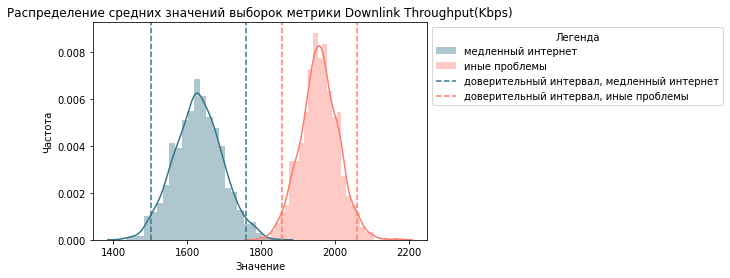

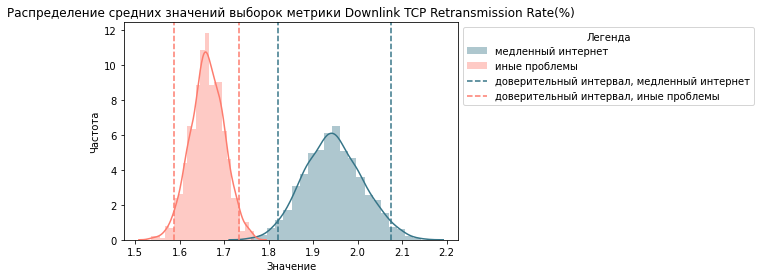

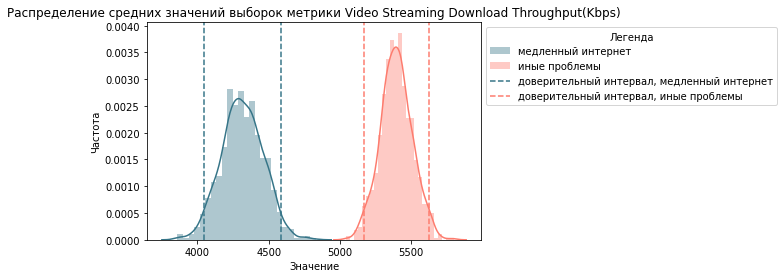

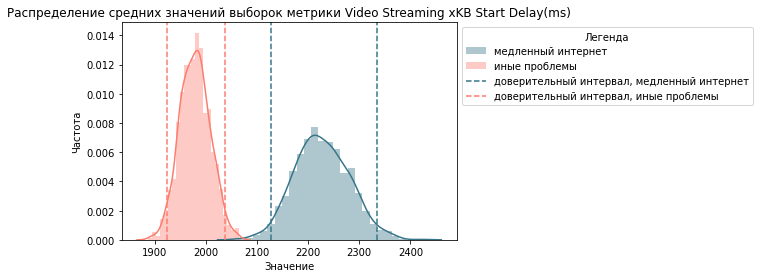

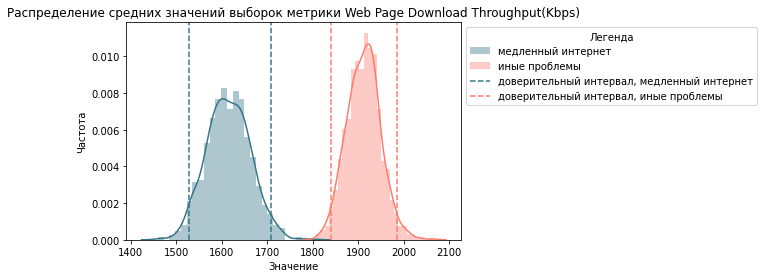

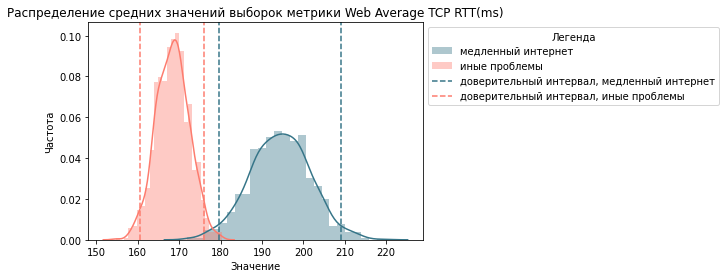

In [90]:
for feature in n_cols[1:]:
    draw_boot_hist(slow_net, others, feature, 'медленный интернет', 'иные проблемы')

**Промежуточный вывод:** Пользователи, указавшие в качестве причины низкой оценки качества услуг компании медленный интернет, действительно имеют показатели хуже, чем у остальных не совсем довольных пользователей. Показатели скорости (пропускной способности) по всем параметрам у них оказались гораздо ниже, а количество ошибок/переотправок/задержек в этой группе было более высоким, чем у других недовольных пользователей.

### 3.4.3 Оценка зависимости значения метрик от количества жалоб

**Посмотрим отличаются ли показателим у тех, кто указал от 3 вариантов недостатков и тех, кто указал меньше:**

**Сформулируем гипотезы:**

*По научному:*
    
H0 - распределение метрики одинаково для указавших 3 и больше причины недовольства и у тех, кто указал 1-2 причины;

H1- распределение метрики статистически значимо отличается для указанных групп пользователей.

*По смыслу:*

H0 - пользователи, указавшие больше причин недовольства, не отличаются от тех, кто предоставил меньше ответов на второй вопрос;

H1 - пользователи с большим количеством жалоб имеют более низкий уровень показателей, чем остальные недовольные пользователи.

In [91]:
many_problems = df_n[df_n['Q2'].str.count(',').add(1) > 2]
many_problems.shape[0]

302

In [92]:
less_problems = df_n[df_n['Q2'].str.count(',').add(1) < 3]
less_problems.shape[0]

1459

In [93]:
for feature in n_cols[1:]:
    U_statest(feature, many_problems[feature], less_problems[feature])
    KS_statest(feature, many_problems[feature], less_problems[feature])

U-критерий по метрике Downlink Throughput(Kbps) :
Statistics=199069.500, p=0.008
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink Throughput(Kbps) :
Statistics=0.086, p=0.046
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Downlink TCP Retransmission Rate(%) :
Statistics=248742.000, p=0.000
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Downlink TCP Retransmission Rate(%) :
Statistics=0.105, p=0.007
Разное распределение метрики (H1 принимается)
----------------------------------
U-критерий по метрике Video Streaming Download Throughput(Kbps) :
Statistics=192344.000, p=0.001
Разное распределение метрики (H1 принимается)
----------------------------------
Тест Колмогорова-Смирнова по метрике Video Streaming Download Throughput(Kbps) :
Statistics=0.124, p=0.001
Разное распределение метрик

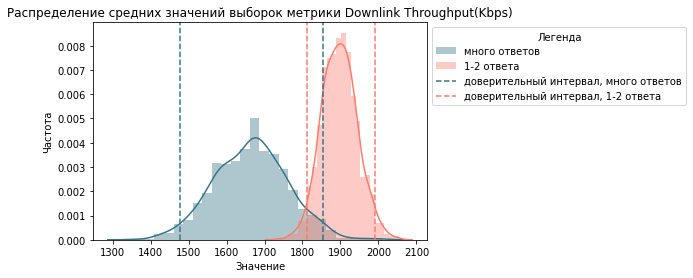

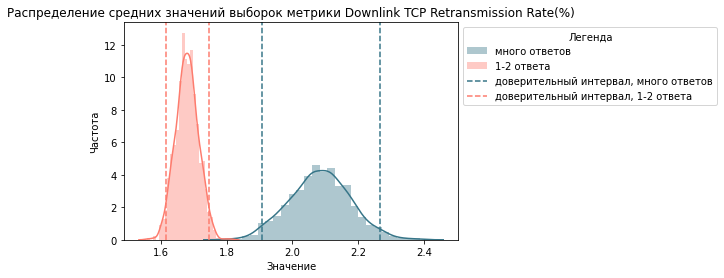

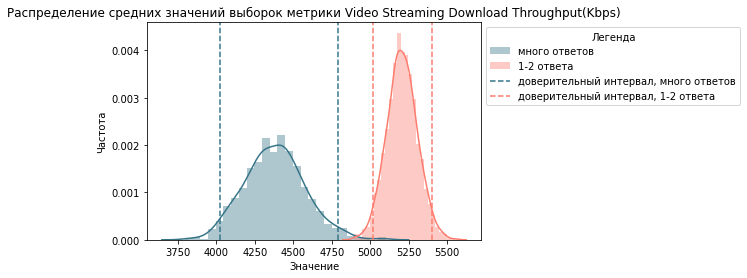

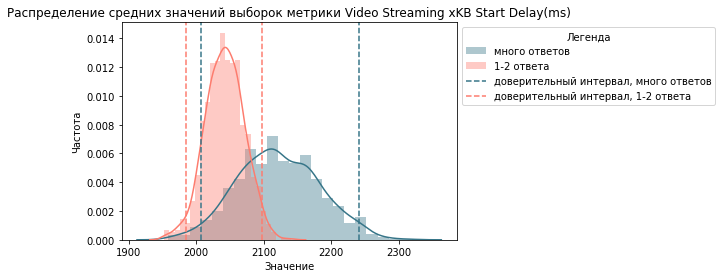

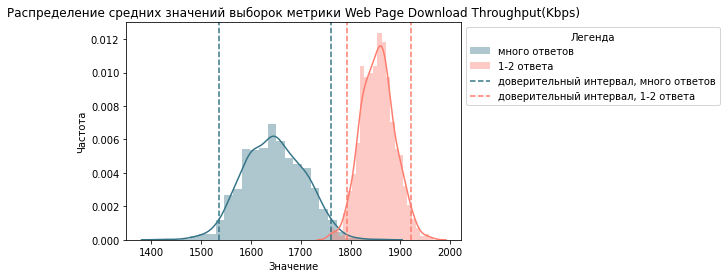

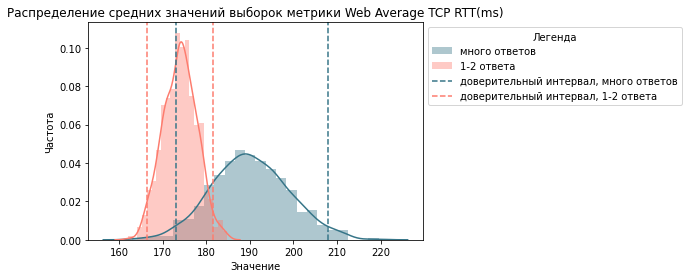

In [94]:
for feature in n_cols[1:]:
    draw_boot_hist(many_problems, less_problems, feature, 'много ответов', '1-2 ответа')

**Промежуточный вывод:** Пользователи, указавшие больше 2-х причин недовольства услугами компании действительно имеют более проблемные значения по всем показателям по сравнению с теми, кто предоставил 1-2 причины низкой оценки качсетва услуг компании.

**Вывод по разделу:** анализ метрик в части ответов на второй вопрос выявил ряд интересных закономерностей.

Во-первых, выяснилось, что для многих пользователей проблемы со связью имеют комплексный характер - страдает и телефонная связь и интернет одновременно. Это может говорить о наличии регионов с плохим покрытием связи Мегафон.

Во-вторых, внутри группы недовольных также наблюдается некая дифференциация. 

Так, показатели оказались хуже:
1) у группы, указавшей как основную жалобу медленный интернет, по сравнению с остальными не совсем довольными пользователями;

2) у группы, оставившей более от трех и выше ответов на второй вопрос опроса по сравнению с теми, кто указал одну-две причины.

Это свидетельствует о том, что значительная часть пользователей, решивших оставить ответ на второй вопрос, действительно вдумчиво подошла к ответам, что позволяет относится к анализируемым данным с высокой степенью доверия.

# Итоги работы

Для анализа нам были предоставлены данные опроса пользователей компании Мегафон по оценке качества услуг компании. Ответы на первый вопрос представляют собой конкретную оценку услуг по цифровой шкале от 1 до 10. Второй вопрос представлял собой конкретизацию причин недовольства компанией абонентами, поставившими оценку ниже 9 баллов по вопросу №1. Ответ на него предоставлялся в виде числового обозначения конкретной проблемы из представленного компаний списка с возможностью выбора сразу нескольких вариантов. Помимо этого, нам был предоставлен ряд характеристик связи по каждому из риспондентов. Перед нами была поставлена задача определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов.

Для начала мы очистили и подготовили данные к дальнейшей работе с ними. Далее был произведен предварительный анализ данных. Мы оценили распределение ответов на заданные вопросы, что позволило понять, на какие показатели следует сделать упор в первую очередь - показатели скорости соединения и проигрывания видео, а также показатели, эту скорость снижающие (см. чуть ниже). В дополнение, исходя из представленных ответов, мы предположили наличие сложности оценки пользователями услуг компании по излишне детализированной шкале. 
Далее было предварительно оценено общее распределение значений метрик в разрезе пользователей с оценкой ниже 9 (неудовлетворенных по мнению сотрудников Мегафона, составивших опрос), а также тех, кто поставил 9 и выше (соответственно, уодовлетворенных). В результате были сделаны предположения относительно характера влияния метрик на степень удовлетворенности клиента.
Пройдемся по этим суждениям чуть подробнее.

Показатели, прямым образом действующие на удовлетворенность (чем выше показатель, тем выше удовлетворенность):

* Downlink Throughput(Kbps), средняя скорость «к абоненту»;

* Video Streaming Download Throughput(Kbps), скорость загрузки потокового видео;

* Web Page Download Throughput(Kbps), скорость загрузки web-страниц через браузер;


Показатели, обратным образом действующие на удовлетворенность (чем выше показатель, тем ниже удовлетворенность):

* Downlink TCP Retransmission Rate(%), частота переотправок пакетов «к абоненту» - снижает среднюю скорость к абоненту;

* Video Streaming xKB Start Delay(ms), задержка старта воспроизведения видео - снижает скорость воспроизведения видео;

* Web Average TCP RTT(ms), пинг при просмотре web-страниц -  увеличивает время загрузки веб-страниц.


Показатели не влияющие на удовлетворенность (или влияющие, но несущественно):

* Total Traffic(MB) - данные по объему трафика -  показывают скорее как активно абонент пользуется связью, чем какую-либо качественную характеристику услуг компании.

* Uplink Throughput(Kbps), средняя скорость «от абонента» - для самого абонента не так интересна как метрика.

Исходя из вышеописанного, мы решили включить в анализ показатели из первых двух групп. В то же время мы пришли к выводу, что необходимо еще рассмотреть метрику Total traffic. На удовлетворенность услугами этот показатель влияния не оказывает, но представляет определенный интерес. Дело в том, что пользователи с разным объемом использования могут иметь разные приориетные метрики, влиящие на их оценку качества, поэтому перекос в ту или иную сторону в группе неудовлетворенных и удовлетворенных мог бы привести к ошибочным суждениям по результатам аналитики.

Далее был произведен анализ представленных метрик в разрезе различных групп пользователей. Подробности заново описывать не имеет смысла, поэтом просто кратко пройдемся по результатам:

1) В ходе статистических тестов метрик в группах удовлетворенных и неудовлетворенных мы окончательно убедились в однородности групп по показателю "Total traffic", что позволило нам сравнивать группы довольных/недовольных без необходимости дополнительного их разделения на подгруппы по объему использования. Остальные сравниваемые в разрезе групп метрики показали статистически значимые отличия, т.е. показатели 'Downlink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)', 'Video Streaming Download Throughput(Kbps)', 'Video Streaming xKB Start Delay(ms)', 'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)' в разных группах дейстивтельно отличаются. Для Мегафона такая информация представляет интерес, поскольку это позволит компании выявить конкретные значения показателей, которые делают пользователя удовлетворенным или неудовлетворенным.

2) Нами были проанализированы различия в средних значениях метрик в группах с различными оценками качества услуг согласно ответам на первый вопрос. В итоге был сделан вывод, что есть небходимость пересмотра десятибалльной шкалы оценки качества услуг, поскольку оценки с 8 по 10 и с 1 по 3 показывают очень схожие значения метрик в рамках группы. При этом, разброс значений метрик в группах с оценкой 10 и оценкой 3 можно считать за некие эталоны самых удовлетворительных и самых неудовлетворительных значений по метрикам.  Это позволяет использовать значения метрик в данных группах дла дальнейшего анализа и прогнозирования.

3) Особо следует омтетить, что переход от группы высоких к средним, а далее к низким оценкам всегда сопровождался прежде всего изменением показателя 'Downlink Throughput(Kbps)' - средней скорости к абоненту или пропускной способности канала связи. Можно сделать вывод, что среди всех метрик эта является приоритетной для пользователя. Далее менялись показатели скорости загрузки потокового видео и веб-страниц. А у пользователей с более низкой оценкой, что характерно, был более высокий пинг при просмотре веб-страниц.

4) Аанализ метрик в части ответов на второй вопрос также выявил ряд интересных закономерностей.
В частности, выяснилось, например, что для многих пользователей проблемы со связью имеют комплексный характер - страдает и телефонная связь и интернет одновременно. С большой долью вероятности такие абоненты живут или работают в местах, где со связью компании Мегафон есть проблемы. Для компании эта информация тоже ценна, поскольку подсказывает в каких регионах требуется её дополнительная работа в целях устранения текущих неисправностей.

5) Также мы сравнили показатели в разрезе других групп по второму вопросу. 
В итоге было выявлено, что метрики чаще приобретают худшие значения:
* в группе, указавшей как основную жалобу медленный интернет, по сравнению с остальными не совсем довольными пользователями;
* в группе, оставившей более от трех и выше ответов на второй вопрос опроса, по сравнению с теми, кто указал одну-две причины.

В числе прочего, это также говорит о том, что значительная часть пользователей, решивших оставить ответ на второй вопрос, действительно вдумчиво подошла к ответам. Это позволяет относится к анализируемым данным с высокой степенью доверия.